In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
import datetime
from datetime import date,datetime
import re
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
import plotly.express as px
import plotly.graph_objects as go
import imageio
import time
from time import mktime
import warnings
warnings.filterwarnings("ignore")

In [2]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install xlrd

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install squarify

Note: you may need to restart the kernel to use updated packages.


In [5]:
from wordcloud import WordCloud, STOPWORDS
import squarify as sq

In [6]:
#Reading the Dataset
xls = pd.ExcelFile('HospitalDatabase.xlsx')
#Reading the ReAdmissionRegistry sheet
df_RR = pd.read_excel(xls, 'ReAdmissionRegistry')
#Reading the Patients sheet
df_PA = pd.read_excel(xls, 'Patients')
#Reading the EDVisits sheet
df_EDV= pd.read_excel(xls, 'EDVisits')
#Reading the AmbulatoryVisits sheet
df_AV = pd.read_excel(xls, 'AmbulatoryVisits')
#Reading the Discharges sheet
df_D = pd.read_excel(xls, 'Discharges')
#Reading the Providers sheet
df_P= pd.read_excel(xls, 'Providers')
#Reading the EDUnique sheet
df_EDU = pd.read_excel(xls, 'EDUnique')

# The Exploratory Data Analysis (EDA)

## Profiling the data to check quality of the data and data types of each column.

In [7]:
df_PA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 945 entries, 0 to 944
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   PatientID    945 non-null    int64         
 1   FirstName    945 non-null    object        
 2   LastName     945 non-null    object        
 3   DateOfBirth  945 non-null    datetime64[ns]
 4   Gender       945 non-null    object        
 5   Race         945 non-null    object        
 6   Language     937 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(5)
memory usage: 51.8+ KB


## Calculate the memory usage of a each column in a dataframe

In [8]:
df_PA.memory_usage()

Index           132
PatientID      7560
FirstName      7560
LastName       7560
DateOfBirth    7560
Gender         7560
Race           7560
Language       7560
dtype: int64

## Display the first five rows of the dataframe

In [9]:
df_PA.head()

PatientID FirstName LastName             DateOfBirth Gender   Race Language
0          1     Lanni      Sue 1960-01-01 00:00:00.000   Male  White  English
1          2       Far    Myers 1985-11-15 02:08:42.090   Male  White  English
2          3   Devlin   Michael 1976-04-15 02:52:09.762   Male  White  English
3          4   Carmine    Texas 1968-10-15 03:32:13.635   Male  White  English
4          5     Tann      Bama 1962-05-01 19:12:58.950   Male  White  English

## Number of samples and features by Shape Number of Patient Record

In [10]:
print("Number of records (patients): ", df_PA.shape[0])

Number of records (patients):  945


## Sorting the Dataframe in Desending Order of Patient ID

In [11]:
df_PA.loc[::-1]

PatientID FirstName  LastName             DateOfBirth Gender  \
944        945     Walsh    Calvie 1972-08-06 03:40:03.454   Male   
943        944  Panchito   Sharple 1963-06-05 07:57:05.569   Male   
942        943   Diahann   Smeeton 1983-01-08 21:49:27.884   Male   
941        942    Wandie  Baythrop 1970-06-10 21:41:03.814   Male   
940        941       Wat   Fideler 1986-05-26 00:01:19.761   Male   
..         ...       ...       ...                     ...    ...   
4            5     Tann       Bama 1962-05-01 19:12:58.950   Male   
3            4   Carmine     Texas 1968-10-15 03:32:13.635   Male   
2            3   Devlin    Michael 1976-04-15 02:52:09.762   Male   
1            2       Far     Myers 1985-11-15 02:08:42.090   Male   
0            1     Lanni       Sue 1960-01-01 00:00:00.000   Male   

                       Race Language  
944  Black/African-American  English  
943  Black/African-American  English  
942  Black/African-American  English  
941  Black/African-American  English  
940  Black/African-American  English  
..                      ...      ...  
4                     White  English  
3                     White  English  
2                     White  English  
1                     White  English  
0                     White  English  

[945 rows x 7 columns]

# Converting rows into columns

In [12]:
pd.melt(df_PA)

variable    value
0     PatientID        1
1     PatientID        2
2     PatientID        3
3     PatientID        4
4     PatientID        5
...         ...      ...
6610   Language  English
6611   Language  English
6612   Language  English
6613   Language  English
6614   Language  English

[6615 rows x 2 columns]

## Selcting coulmns based on data type

In [13]:
df_PA.dtypes

PatientID               int64
FirstName              object
LastName               object
DateOfBirth    datetime64[ns]
Gender                 object
Race                   object
Language               object
dtype: object

In [14]:
df_PA.select_dtypes(include='object').head()

FirstName LastName Gender   Race Language
0     Lanni      Sue   Male  White  English
1       Far    Myers   Male  White  English
2   Devlin   Michael   Male  White  English
3   Carmine    Texas   Male  White  English
4     Tann      Bama   Male  White  English

# Cleaning and Preparing Your Data

## Check whether there are null values in each column

In [15]:
df_AV.isnull().sum()

VisitID                     0
PatientMRN                  0
ProviderID                  0
DateofVisit                 0
DateScheduled               0
VisitDepartmentID           0
VisitType                   0
BloodPressureSystolic     124
BloodPressureDiastolic    124
Pulse                     124
VisitStatus                 0
dtype: int64

## Finding Duplicates Values in the Dataframe

In [16]:
df_PA.duplicated().sum()

0

## Replacing a Null Values to Not Recorded as we had String Data Type

In [17]:
df_PA["Language"].fillna("Not Recorded", inplace = True)
df_PA.head(250)

PatientID    FirstName    LastName             DateOfBirth  Gender  \
0            1        Lanni         Sue 1960-01-01 00:00:00.000    Male   
1            2          Far       Myers 1985-11-15 02:08:42.090    Male   
2            3      Devlin      Michael 1976-04-15 02:52:09.762    Male   
3            4      Carmine       Texas 1968-10-15 03:32:13.635    Male   
4            5        Tann         Bama 1962-05-01 19:12:58.950    Male   
..         ...          ...         ...                     ...     ...   
245        246     Cummings      Kippax 1978-01-02 13:07:23.435  Female   
246        247        Selia  Barnewille 1973-12-14 03:16:46.833  Female   
247        248  Worthington       Miere 1976-07-21 13:46:48.020  Female   
248        249       Rempel     Krienke 1980-08-21 17:12:07.772  Female   
249        250        Maryl      Cawsby 1964-06-09 16:27:32.874    Male   

                       Race      Language  
0                     White       English  
1                     White       English  
2                     White       English  
3                     White       English  
4                     White       English  
..                      ...           ...  
245  Black/African-American       English  
246  Black/African-American  Not Recorded  
247  Black/African-American  Not Recorded  
248  Black/African-American  Not Recorded  
249  Black/African-American  Not Recorded  

[250 rows x 7 columns]

## Check unique values in all the columns

In [18]:
print("Unique Values in 'Gender'", list(df_PA['Gender'].unique()))

Unique Values in 'Gender' ['Male', 'Female']


In [19]:
print("Unique Values in 'Race'", list(df_PA['Race'].unique()))

Unique Values in 'Race' ['White', 'Black/African-American']


In [20]:
print("Unique Values in 'Language'", list(df_PA['Language'].unique()))

Unique Values in 'Language' ['English', 'Spanish', 'Not Recorded']


## Basic statistics OF a Dataframe

In [21]:
df_PA.describe()

PatientID
count  945.000000
mean   473.000000
std    272.942302
min      1.000000
25%    237.000000
50%    473.000000
75%    709.000000
max    945.000000

# Plotting data Visulization

## Patients distribution by Race

Text(0.5, 1.0, 'Patients distribution by Race')

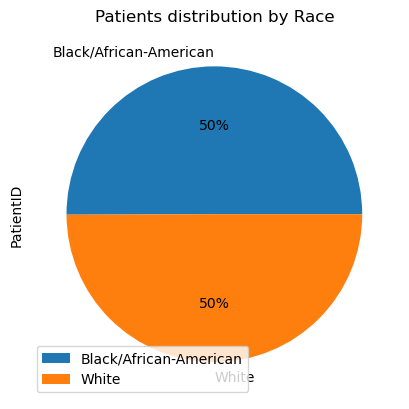

In [22]:
df_PA.groupby(['Race']).count().plot(kind='pie', y='PatientID',autopct='%1.0f%%',)
plt.title("Patients distribution by Race")

## Patients distribution by Language

Text(0.5, 1.0, 'Patients distribution by Language')

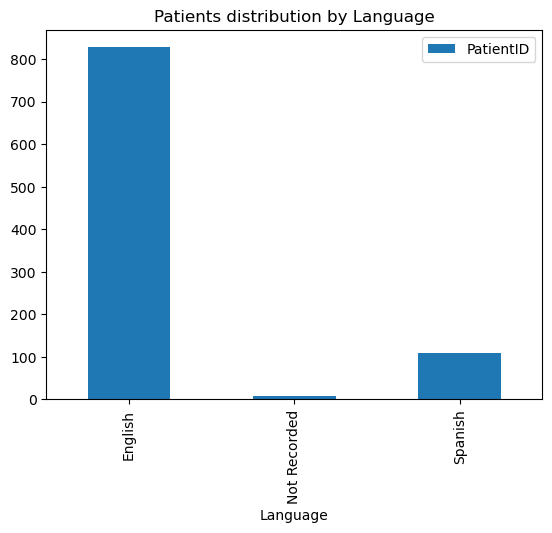

In [23]:
df_PA.groupby(['Language']).count().plot(kind='bar', y='PatientID')
plt.title("Patients distribution by Language")

## Relationship between SBP and DBP

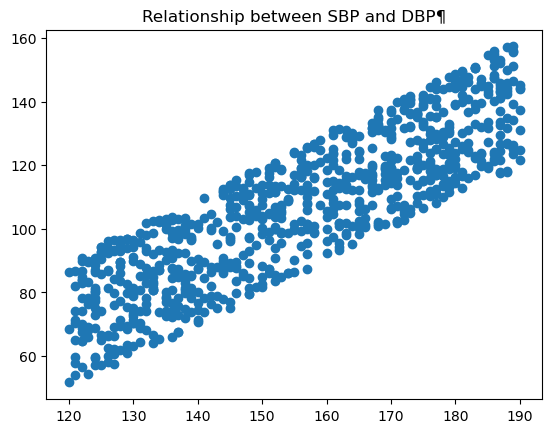

In [24]:
plt.scatter(df_AV['BloodPressureSystolic'], df_AV['BloodPressureDiastolic'])
plt.title("Relationship between SBP and DBP¶")
plt.show()

#A scatter chart shows the relationship between two different variables and it can reveal the distribution trends.
#This is useful when looking for outliers and for understanding the distribution of your data.

## Calculate Average Length of stay

In [25]:
df_RR_stay=df_RR['DischargeDate']-df_RR['AdmissionDate']
df_RR_stay_new=df_RR_stay.mean()
print(df_RR_stay_new)

10 days 00:37:20.538901388


## Length of Stay by disposition

Text(0.5, 1.0, 'Length of Stay by Disposition')

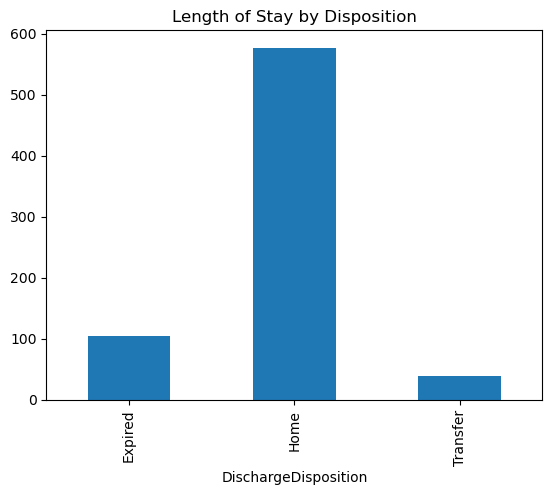

In [26]:
df_RR.groupby(['DischargeDisposition'])['ExpectedLOS'].count().plot(kind='bar', y='ExpectedLOS')
plt.title("Length of Stay by Disposition")

## Pair Plot of Service

Text(-0.5, 3.1, 'Pair plot of Service')

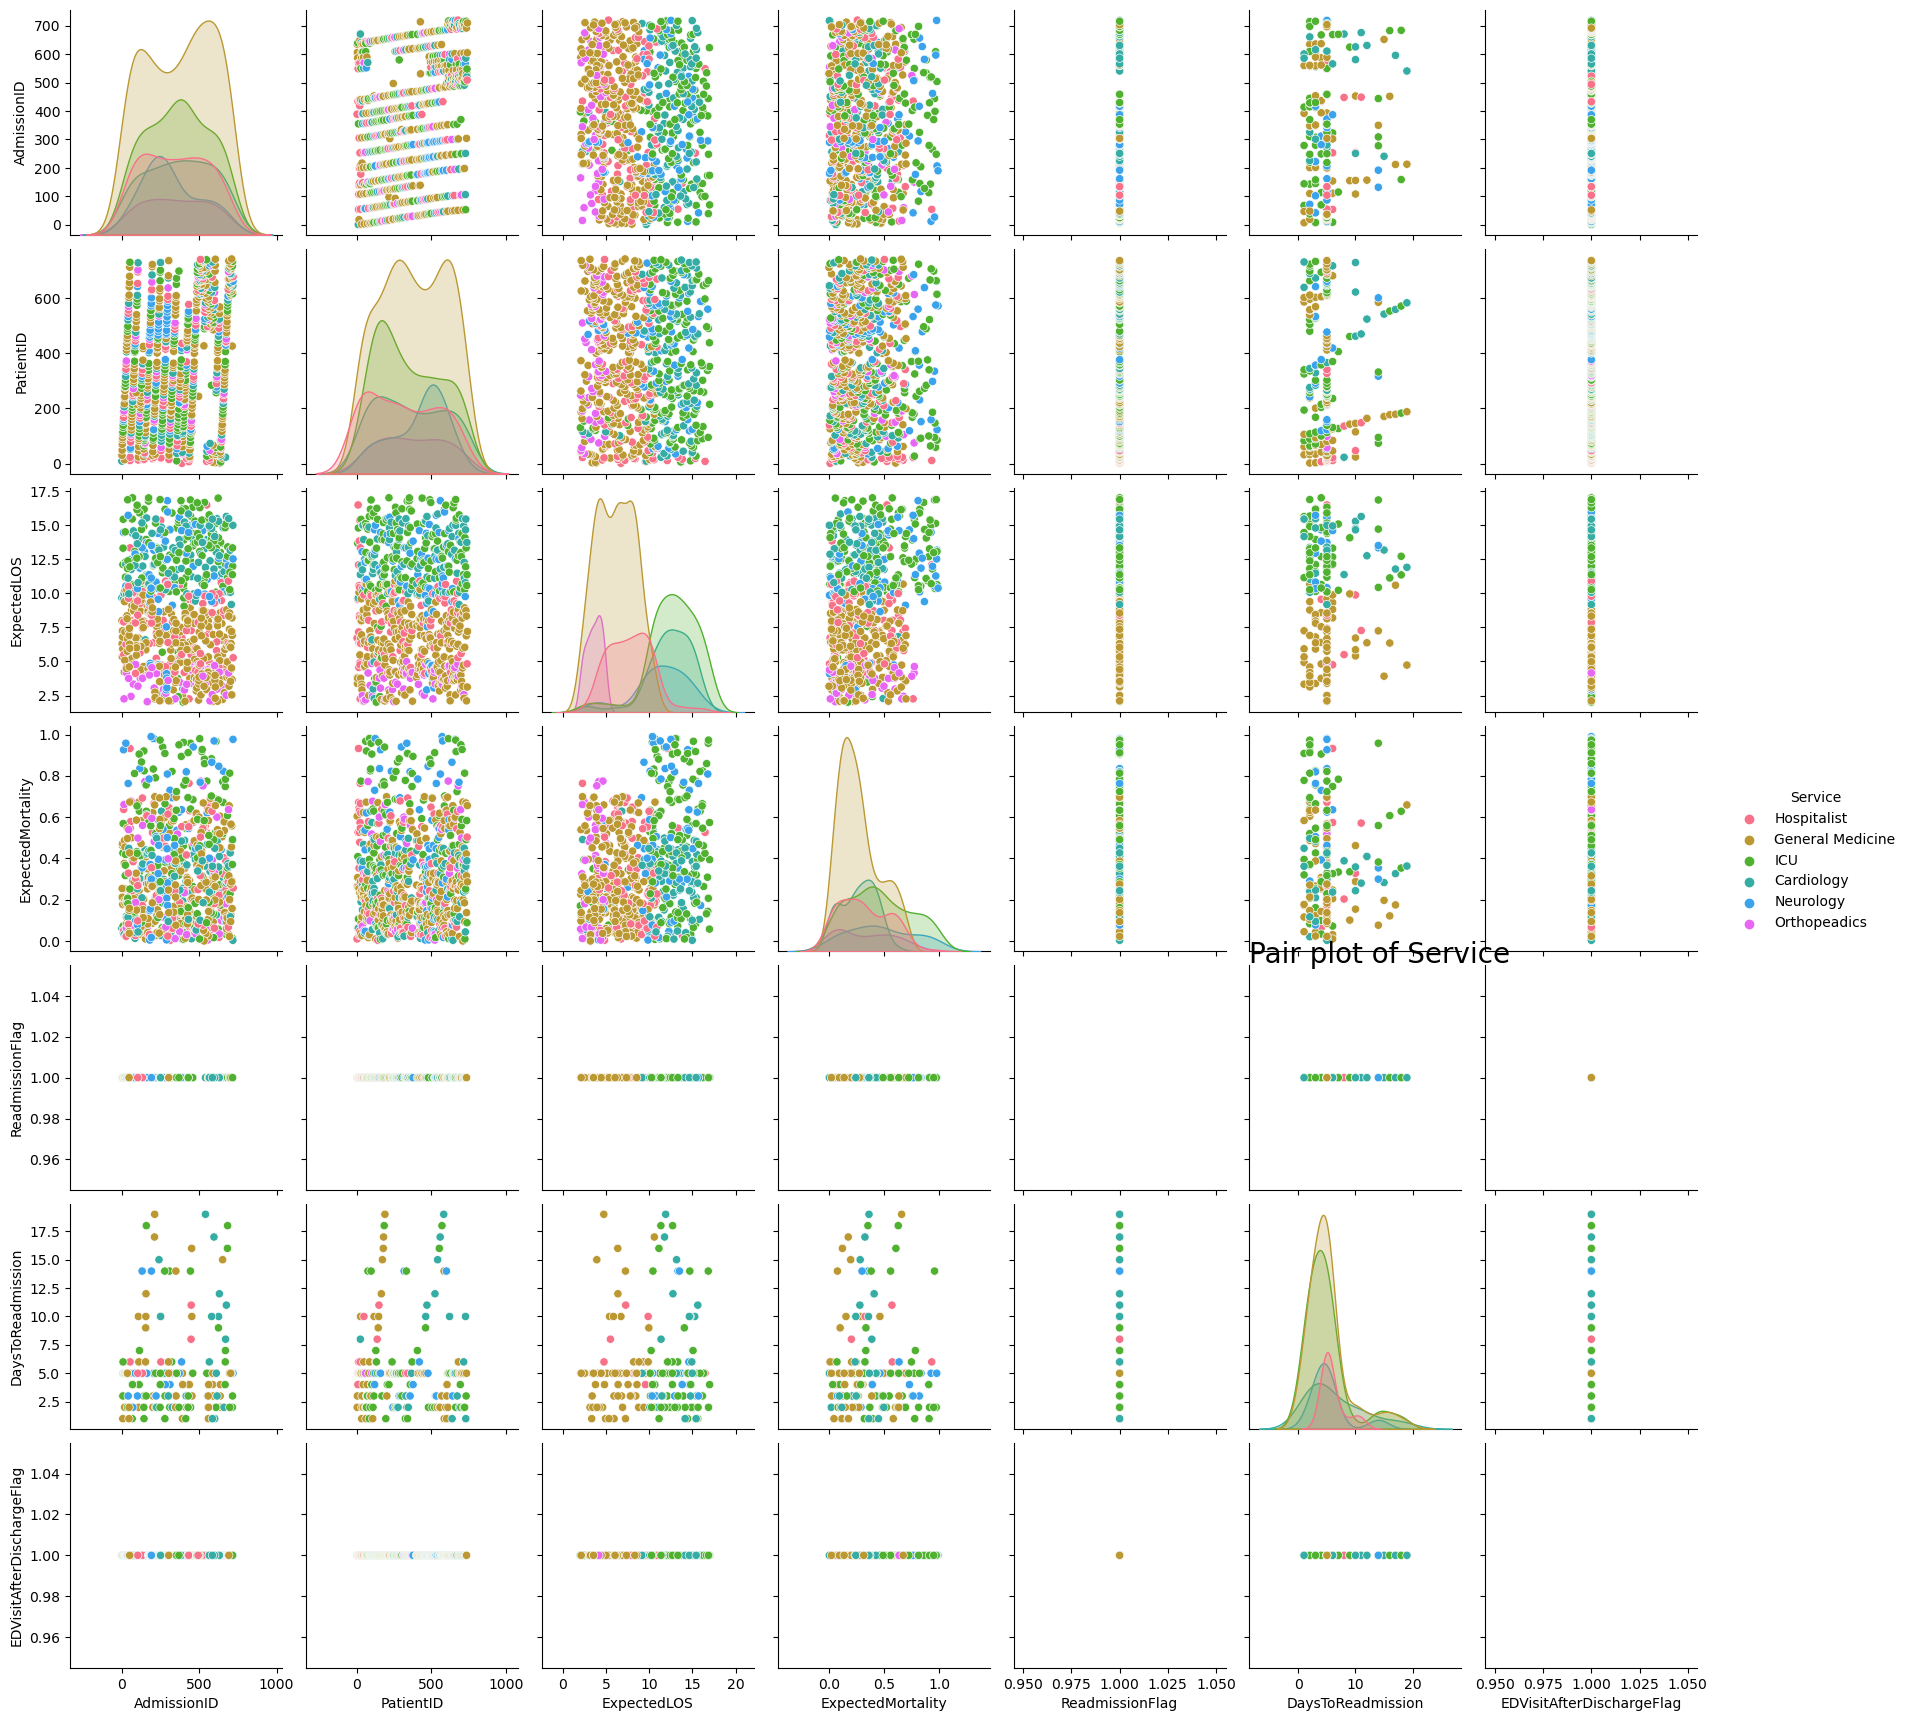

In [27]:
sns.pairplot(df_RR,hue="Service",palette="husl")
plt.title("Pair plot of Service",y=3.1,x=-0.5,fontsize=20)

## Displaying Provider name for ProviderSpecialty Cardiology

In [28]:
Prov_Name=df_P.loc[df_P['ProviderSpecialty'] == 'Cardiology']
print("Displaying Provider name  ")
Prov_Name['ProviderName']

Displaying Provider name  


16     Kent Kendall
17       Ryan Kevin
18     Tyler Conner
19    Bailey Barret
20      Megan Bonco
21    Joesph Walter
22      Walter King
23        Luke Long
Name: ProviderName, dtype: object

## Analysis of 2 Variables SBP and DBP using 3 D

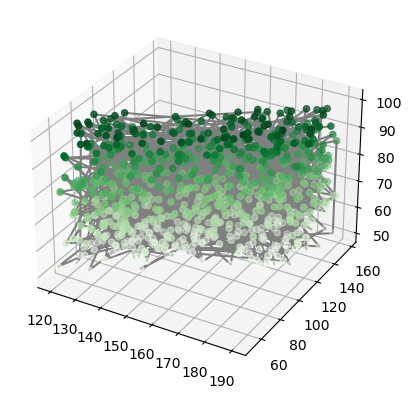

In [29]:
ax = plt.axes(projection='3d')
df_3D= df_AV[['BloodPressureSystolic','BloodPressureDiastolic','Pulse']]
# Data for a three-dimensional line
zline = df_3D['Pulse']
xline = df_3D['BloodPressureSystolic']
yline = df_3D['BloodPressureDiastolic']
ax.plot3D(xline, yline, zline, 'gray')

# Data for three-dimensional scattered points
zdata = df_3D['Pulse']
xdata = df_3D['BloodPressureSystolic']
ydata = df_3D['BloodPressureDiastolic']
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens');

## Heat Map of a ALL the Tables of the Dataset

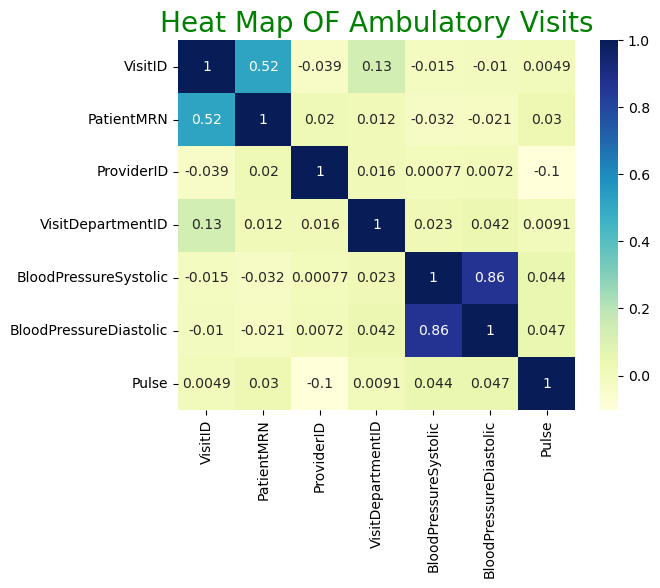

In [30]:
df_ReReg = df_AV.corr()
sns.heatmap(df_ReReg, annot=True, cmap=plt.cm.YlGnBu)
plt.title("Heat Map OF Ambulatory Visits", color = 'green',fontsize=20)
plt.show()

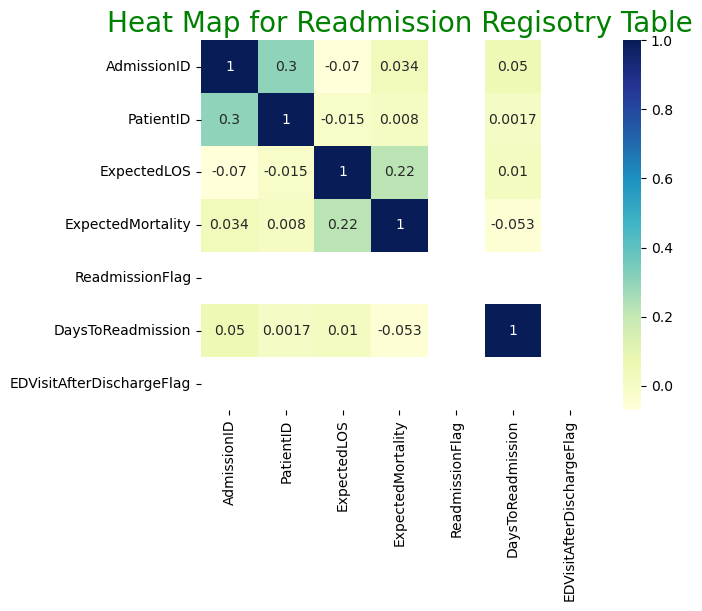

In [31]:
df_ReReg = df_RR.corr()
sns.heatmap(df_ReReg, annot=True, cmap=plt.cm.YlGnBu)
plt.title("Heat Map for Readmission Regisotry Table",color = 'green',fontsize=20)
plt.show()

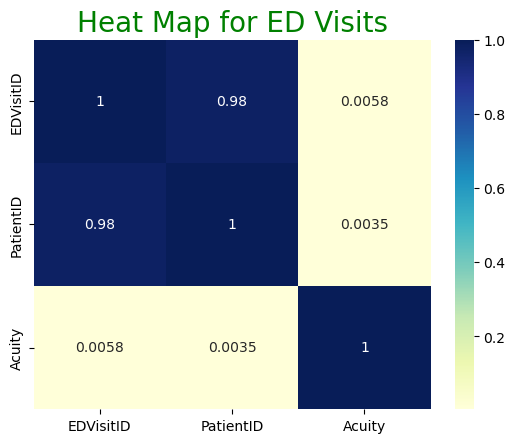

In [32]:
df_ReReg = df_EDV.corr()
sns.heatmap(df_ReReg, annot=True, cmap=plt.cm.YlGnBu)
plt.title("Heat Map for ED Visits",color = 'green',fontsize=20)
plt.show()

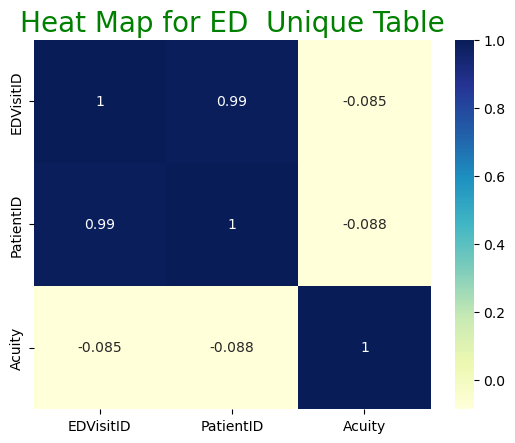

In [33]:
df_ReReg = df_EDU.corr()
sns.heatmap(df_ReReg, annot=True, cmap=plt.cm.YlGnBu)
plt.title("Heat Map for ED  Unique Table",color = 'green',fontsize=20)
plt.show()

# Patient Count by VisitType

In [34]:
df_AV = pd.read_excel(xls, 'AmbulatoryVisits')
pivot_date = df_AV.pivot_table(index = ['VisitType'],values=['PatientMRN'], aggfunc='count')
pivot_date = pivot_date.rename(columns = {'PatientMRN':'No. of Patients'})
print (pivot_date)

              No. of Patients
VisitType                    
Follow Up                 336
New                       125
Physical                  205
Telemedicine              284


# NoShowRate

In [35]:
No_Show=df_AV[df_AV['VisitStatus'] == 'No Show']
No_Show_Rate=No_Show['PatientMRN'].count()/df_AV['PatientMRN'].count()
percentage = "{:.0%}".format(No_Show_Rate)
print("The NoShowRate :  ",percentage)

The NoShowRate :   16%


# Plotting the Bar graph for Visit Type

Text(0.5, 1.0, 'Bar graph for Visit Type')

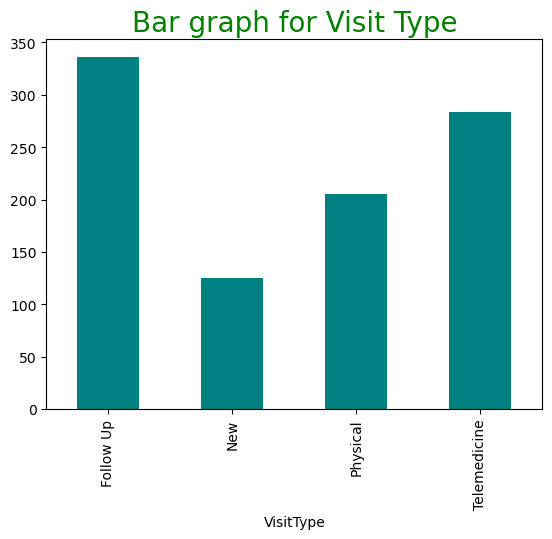

In [36]:
df_AV.groupby(['VisitType'])['PatientMRN'].count().plot(kind='bar', y='ExpectedLOS',color='Teal')
plt.title("Bar graph for Visit Type", color = 'green',fontsize=20)

# Plotting the Distrubution graph for Age Type

Text(0.5, 0, 'Age.')

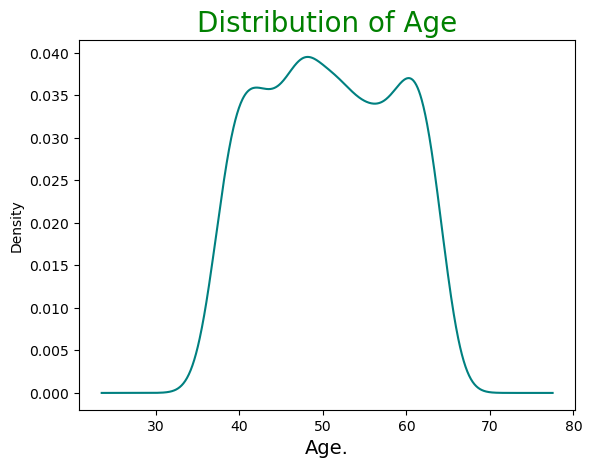

In [37]:
from datetime import datetime, date
dob = df_PA['DateOfBirth']

#defining age column 
def age(born):
    born = pd.to_datetime(born).date()
    today = date.today()
    return today.year - born.year - ((today.month, 
                                      today.day) < (born.month, 
                                                    born.day))
  
df_PA['Age'] = dob.apply(age)
Age_Quartiles = pd.qcut(df_PA['Age'], 4, labels=['Young', 'Middle Age', 'Senior', 'Old'])
df_PA = df_PA.assign(Age_Quartile=Age_Quartiles.values)
df_PA['Age'].plot(kind='kde',color='teal')
plt.title('Distribution of Age', color = 'green',fontsize=20)
plt.xlabel('Age.', fontsize=14)

# Display the Details of ICU Patients who have expired and their Count

In [38]:
df_ICUEx = df_D[(df_D.Service == 'ICU') & (df_D.DischargeDisposition == 'Expired')].reset_index(drop = True)
df_ICUEx_count = pd.DataFrame(df_ICUEx, index=None)
rows_ICU = len(df_ICUEx_count.axes[0])
print('')
print("Number of Expired ICU Patients : ", rows_ICU)
display (df_ICUEx)


Number of Expired ICU Patients :  29


AdmissionID  PatientID AdmissionDate           DischargeDate  \
0           362        120    2018-01-08 2018-01-22 01:52:11.231   
1           260        125    2018-01-09 2018-01-15 13:54:15.782   
2           363        129    2018-01-09 2018-01-20 03:08:42.569   
3           397        130    2018-01-09 2018-01-21 17:46:07.546   
4           398        134    2018-01-10 2018-01-15 16:43:47.026   
5           261        138    2018-01-10 2018-01-21 10:50:57.021   
6           364        142    2018-01-10 2018-01-23 20:04:41.057   
7           262        144    2018-01-11 2018-01-14 05:41:38.325   
8           399        147    2018-01-11 2018-01-16 10:31:32.129   
9           365        154    2018-01-11 2018-01-27 19:20:41.204   
10          263        156    2018-01-12 2018-01-16 05:36:13.111   
11          400        157    2018-01-12 2018-01-18 15:28:06.137   
12          366        162    2018-01-12 2018-01-21 10:03:58.885   
13          367        166    2018-01-13 2018-01-16 01:38:57.317   
14          401        169    2018-01-13 2018-01-19 22:18:35.647   
15          264        176    2018-01-13 2018-01-29 21:03:05.689   
16          368        178    2018-01-14 2018-01-18 13:44:53.072   
17          402        184    2018-01-14 2018-01-29 06:29:43.449   
18          265        186    2018-01-14 2018-01-30 20:18:36.458   
19          266        192    2018-01-15 2018-01-23 18:16:55.746   
20          160        193    2018-01-15 2018-01-24 07:42:09.110   
21          403        196    2018-01-15 2018-01-26 13:33:12.198   
22          121        197    2018-01-15 2018-01-27 08:45:06.174   
23          369        198    2018-01-15 2018-01-31 14:28:07.437   
24          174        352    2018-01-29 2018-02-02 21:21:45.388   
25          175        363    2018-01-30 2018-02-02 11:57:56.379   
26          233        450    2018-02-04 2018-02-19 02:18:01.432   
27          234        455    2018-02-05 2018-02-14 18:28:11.305   
28          685        582    2018-02-15 2018-02-22 04:50:55.049   

   DischargeDisposition Service    PrimaryDiagnosis  ExpectedLOS  \
0               Expired     ICU        Hypertension     3.748881   
1               Expired     ICU        Hypertension     3.440046   
2               Expired     ICU               Fever     3.491948   
3               Expired     ICU                 Flu     2.012974   
4               Expired     ICU           Pneumonia    16.225126   
5               Expired     ICU        Hypertension     7.507728   
6               Expired     ICU               Fever     5.669601   
7               Expired     ICU        Hypertension     5.673476   
8               Expired     ICU           Pneumonia    10.352633   
9               Expired     ICU               Fever     2.420531   
10              Expired     ICU       Heart Failure    11.499480   
11              Expired     ICU           Pneumonia    10.665040   
12              Expired     ICU                 Flu     7.574822   
13              Expired     ICU                 Flu     5.273817   
14              Expired     ICU                Afib     9.651522   
15              Expired     ICU       Heart Failure    14.348074   
16              Expired     ICU  Spinal Cord Injury    15.183750   
17              Expired     ICU              Stroke    13.910330   
18              Expired     ICU       Heart Failure    11.775196   
19              Expired     ICU       Heart Failure    11.849023   
20              Expired     ICU           Pneumonia    10.653874   
21              Expired     ICU      Kidney Failure     9.045995   
22              Expired     ICU                 AMI    10.685085   
23              Expired     ICU  Spinal Cord Injury    15.369330   
24              Expired     ICU           Pneumonia    16.989907   
25              Expired     ICU           Pneumonia    13.704637   
26              Expired     ICU       Heart Failure    12.244492   
27              Expired     ICU       Heart Failure    13.2

# Type of completed visit with patient count for each visittype

In [39]:
df_VisitComp = df_AV[(df_AV.VisitStatus == 'Completed')]
df_VisitCompcount = df_VisitComp.groupby(['VisitStatus','VisitType'])['PatientMRN'].count().reset_index(name = 'Number of Patients')
display (df_VisitCompcount)

VisitStatus     VisitType  Number of Patients
0   Completed     Follow Up                 266
1   Completed           New                 120
2   Completed      Physical                 155
3   Completed  Telemedicine                 195

# Pie Graph Representation of Type of completed visit with patient count for each visittype, exploding the wedge of completed visit type with highest patient count (Displaying the count of patients in chart) .

VisitStatus     VisitType  Number of Patients
0   Completed     Follow Up                 266
1   Completed           New                 120
2   Completed      Physical                 155
3   Completed  Telemedicine                 195

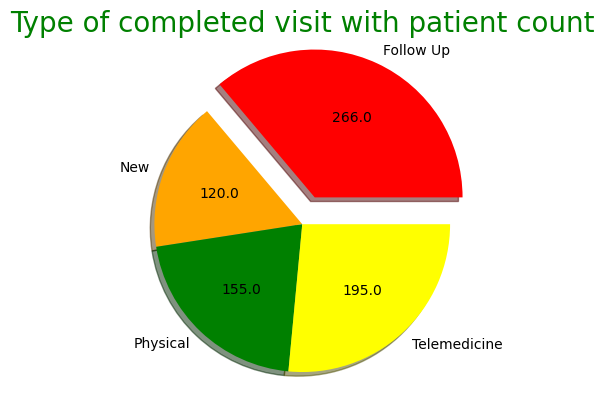

In [40]:
df_VisitComp = df_AV[(df_AV.VisitStatus == 'Completed')]
df_VisitCompcount = df_VisitComp.groupby(['VisitStatus','VisitType'])['PatientMRN'].count().reset_index(name = 'Number of Patients')
display (df_VisitCompcount)
       
y = df_VisitCompcount['Number of Patients']
myexplode = [0.2,0,0,0]
mylabels=df_VisitCompcount['VisitType']
mycolors=["red","orange","green","yellow"]

#defining label
def absolute_value(val):
    a  = np.round(val/100.*y.sum())
    return a

plt.pie(y,explode=myexplode,labels=mylabels,autopct=absolute_value,colors=mycolors,shadow= True)
plt.title(("Type of completed visit with patient count"),  fontsize=20,
          color="green")
plt.show()

# Box PLot for PrimaryDiagnosis and Expected Los

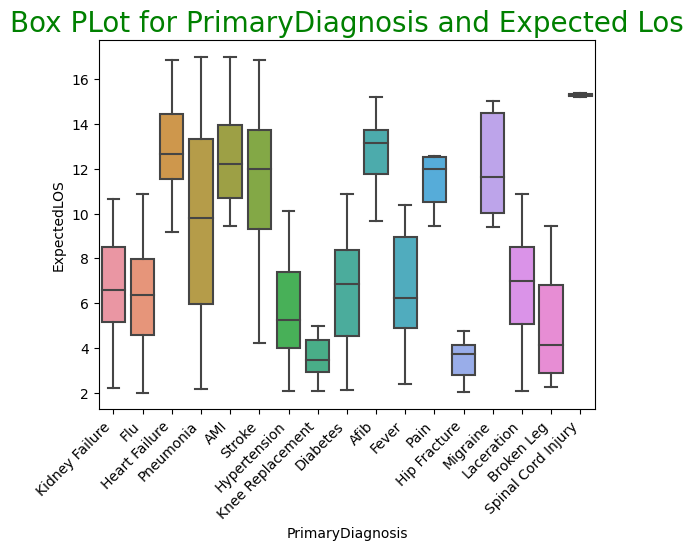

In [41]:
sns.boxplot(data=df_RR, x="PrimaryDiagnosis", y="ExpectedLOS")
plt.title("Box PLot for PrimaryDiagnosis and Expected Los",color = 'green',fontsize=20)
plt.xticks(rotation=45, horizontalalignment="right")
plt.show()

# The list of Patients with Isolated Systolic Hypertension (ISH)

In [42]:
#isolated systolic hypertension is when the systolic bp >= 140 and diastolic bp <=90
df_ISH = df_AV[(df_AV['BloodPressureSystolic']>=140) & (df_AV['BloodPressureDiastolic']<=90)]

#merging two sheets
df_PP_merg = pd.merge(df_PA, df_ISH, left_on = 'PatientID', right_on = 'PatientMRN')
print('')
print('')
print('The Patient Details with ISH')
df_PP_merg



The Patient Details with ISH


PatientID   FirstName    LastName             DateOfBirth  Gender  \
0          18      Sheena       Kevin 1983-01-20 20:40:26.024    Male   
1          20       Megan      Walter 1960-02-10 19:04:57.032    Male   
2          29         Ted       Scott 1967-12-09 05:01:37.892  Female   
3          44       Tyler        Nock 1973-07-19 21:15:32.795  Female   
4          55    Chandler         Pow 1987-01-30 14:58:15.754  Female   
5          56      Joesph         Inc 1962-08-06 10:17:55.653  Female   
6          75  Georgianna     Phillie 1981-10-02 14:44:19.793  Female   
7          76      Kellen      Wandie 1962-11-04 11:34:48.498  Female   
8          78   Annaliese     Walkden 1964-01-17 04:34:44.746  Female   
9          80       Mandi      Cripps 1964-12-22 21:29:11.410  Female   
10         88      Myrtia      Revett 1979-11-03 09:50:24.229    Male   
11         90       Cilka       Alden 1975-11-29 08:50:26.098    Male   
12         95        Abey  Philipsson 1978-06-24 03:54:59.884    Male   
13         96         Far    Rudinger 1985-10-01 06:25:44.657    Male   
14        515        Ewan      Twiggs 1962-02-10 14:11:48.184    Male   
15        530      Jaymee     Physick 1985-09-21 16:36:10.005    Male   
16        536      Derrek    Alekseev 1962-09-21 03:50:55.567    Male   
17        551      Susana     Penwell 1967-04-12 15:42:11.560    Male   
18        572      Kelley       Nizet 1981-03-24 15:56:31.748    Male   
19        578       Jenna     Crinson 1978-04-16 12:45:50.991    Male   
20        581   Constanta       Edgin 1960-06-06 08:19:25.534    Male   
21        804        Jany    Petrovic 1982-08-01 21:48:10.349    Male   
22        819      Zulauf    Bitcheno 1967-04-02 07:17:53.635  Female   
23        827     Shannon         Inc 1975-04-30 14:52:19.461  Female   
24        830  Georgianna       Group 1983-11-16 14:12:54.098  Female   
25        831      Zulauf   O'Shavlan 1970-05-17 08:09:28.988  Female   
26        832       Andie         Inc 1984-06-23 06:18:30.901  Female   
27        843       Hauck  Antognazzi 1963-03-18 03:01:56.725  Female   
28        844   Silvester  Restaurant 1966-06-18 18:22:39.399  Female   
29        845     Roselin       Group 1965-01-23 03:56:57.430  Female   
30        846        Funk    McGarvey 1971-09-01 22:41:08.668  Female   
31        849       Hauck    Bitcheno 1968-09-17 03:37:44.520  Female   
32        853       Carly       Group 1986-11-21 02:44:49.632  Female   
33        857        Jess         Inc 1966-07-09 11:37:04.539  Female   
34        859        Chev     Kenford 1970-09-20 01:16:57.621  Female   
35        862       Bryon    Kubatsch 1984-09-15 13:16:42.048  Female   
36        863       Lorne       Eayrs 1976-10-16 14:19:38.412  Female   
37        865    Giovanni     Borland 1960-12-01 13:16:18.100  Female   
38        865    Giovanni     Borland 1960-12-01 13:16:18.100  Female   
39        866    Jermayne     Lowndes 1970-12-09 04:49:48.933  Female   
40        869       Worth   Pickering 1986-12-22 08:21:02.691  Female   
41        872        Chev     Hawford 1987-05-03 08:51:27.568  Female   
42        873       Idell      Orbine 1977-01-21 05:13:25.467  Female   
43        876       Gerty   Gheorghie 1962-03-08 09:17:10.706    Male   
44        876       Gerty   Gheorghie 1962-03-08 09:17:10.706    Male   
45        876       Gerty   Gheorghie 1962-03-08 09:17:10.706    Male   
46        883      Munmro     Rubbens 1970-01-30 23:48:09.136    Male   
47        883      Munmro     Rubbens 1970-01-30 23:48:09.136    Male   
48        883      Munmro     Rubbens 1970-01-30 23:48:09.136    Male   
49        885     Kellsie         Inc 1971-11-16 18:11:05.005    Male   
50        893        Gail     McGrath 1982-09-10 05:48:36.003    Male   
51        894        Funk       Betke 1970-02-01 10:36:45.173    Male   
52        896    Starlene     Smeeton 1978-02-13 11:55:16.516    Male   
53        903   Schroeder         Inc 1987-02-20 23:47:30.067 

# The list of Patients with tachycardia

In [43]:
#isolated systolic hypertension is when the systolic bp >= 140 and diastolic bp <=90
df_AV_new = df_AV[(df_AV['Pulse']>100)]

#merging two sheets
df_PP_merg = pd.merge(df_PA, df_AV_new, left_on = 'PatientID', right_on = 'PatientMRN')
print('')
print('')
print('The Patient Details with tachycardia')
df_PP_merg



The Patient Details with tachycardia


Empty DataFrame
Columns: [PatientID, FirstName, LastName, DateOfBirth, Gender, Race, Language, Age, Age_Quartile, VisitID, PatientMRN, ProviderID, DateofVisit, DateScheduled, VisitDepartmentID, VisitType, BloodPressureSystolic, BloodPressureDiastolic, Pulse, VisitStatus]
Index: []

We got the Insight that No patients are suffering from tachycardia in the dataset.

# Displaying Maximum Heart Rate Patient Details

In [44]:
df_ISH = df_AV[(df_AV['Pulse']==(df_AV['Pulse'].max()))]
df_ISH   

VisitID  PatientMRN  ProviderID DateofVisit           DateScheduled  \
495      174         812          22  2019-02-19 2019-01-31 21:32:02.485   

     VisitDepartmentID  VisitType  BloodPressureSystolic  \
495                  6  Follow Up                  182.0   

     BloodPressureDiastolic      Pulse VisitStatus  
495              115.899432  99.986463   Completed

# Displaying Patient Details whose Visit status is NOSHOW

In [45]:
#isolated systolic hypertension is when the systolic bp >= 140 and diastolic bp <=90
df_AV_new = df_AV[(df_AV['VisitStatus']=='No Show')]

#merging two sheets
df_PP_merg = pd.merge(df_PA, df_AV_new, left_on = 'PatientID', right_on = 'PatientMRN')
print('')
print('')
print('The Patient Details with Noshow')
df_PP_merg



The Patient Details with Noshow


PatientID FirstName   LastName             DateOfBirth  Gender  \
0           29       Ted      Scott 1967-12-09 05:01:37.892  Female   
1           30       Ala    Halpert 1986-11-26 10:44:22.628  Female   
2           31     Harry       Ding 1960-10-08 01:42:51.212  Female   
3           32     Barry      Creed 1982-01-24 04:22:39.081  Female   
4           33       Ted    Stanley 1982-07-28 23:48:05.177  Female   
..         ...       ...        ...                     ...     ...   
149        898    Melina   Siseland 1979-08-04 03:48:41.794    Male   
150        899   Roselin       Ivic 1979-11-13 08:49:17.238    Male   
151        900     Bryon      Group 1964-07-18 06:09:09.793    Male   
152        901  Champlin    Goatman 1978-02-13 01:49:31.446    Male   
153        902     Chick  Gheorghie 1964-12-31 13:06:51.761    Male   

                       Race Language  Age Age_Quartile  VisitID  PatientMRN  \
0                     White  Spanish   56       Senior      512          29   
1                     White  Spanish   37        Young      513          30   
2                     White  Spanish   63          Old      514          31   
3                     White  Spanish   42        Young      515          32   
4                     White  Spanish   42        Young      516          33   
..                      ...      ...  ...          ...      ...         ...   
149                   White  English   45   Middle Age      813         898   
150  Black/African-American  English   44        Young      814         899   
151  Black/African-American  English   60          Old      815         900   
152  Black/African-American  English   46   Middle Age      816         901   
153  Black/African-American  English   59          Old      817         902   

     ProviderID DateofVisit           DateScheduled  VisitDepartmentID  \
0             5  2019-01-30 2019-01-20 14:52:42.389                  8   
1             6  2019-01-31 2019-01-15 05:22:03.151                  9   
2             7  2019-02-01 2019-01-23 07:08:53.701                 10   
3            26  2019-03-16 2019-02-20 06:44:59.617                 11   
4             9  2019-03-17 2019-03-05 15:18:50.658                 10   
..          ...         ...                     ...                ...   
149          25  2019-03-17 2019-03-01 06:03:35.234                  6   
150          26  2019-03-18 2019-03-08 19:59:21.231                  7   
151          27  2019-03-19 2019-02-26 23:09:09.869                  8   
152          28  2019-03-20 2019-03-18 07:36:32.091                  9   
153          29  2019-03-21 2019-02-27 03:21:29.883                 10   

        VisitType  BloodPressureSystolic  BloodPressureDiastolic      Pulse  \
0    Telemedicine                  153.0              105.484952  59.661863   
1    Telemedicine                  158.0               98.708858  50.277119   
2    Telemedicine                  126.0               87.061719  64.257006   
3    Telemedicine                  131.0               85.115632  89.192362   
4    Telemedicine                  170.0              106.426979  56.919384   
..            ...                    ...                     ...        ...   
149      Physical                  174.0              122.910704  86.423680   
150      Physical                  149.0              106.026511  57.272226   
151      Physical                  155.0              101.539324  57.661126   
152      Physical                  176.0              111.960001  70.290737   
153      Physical                  128.0               71.428511  82.930375   

    VisitStatus  
0       No Show  
1       No Show  
2       No Show  
3       No Show  
4       No Show  
..          ...  
149     No Show  
150     No Show  
151     No Show  
152     No Show  
153     No Show  

[154 rows x 20 columns]

# Race and Gender which is more prone to Isolated Systolic Hypertension (ISH)

In [46]:
#isolated systolic hypertension is when the systolic bp >= 140 and diastolic bp <=90
df_ISH = df_AV[(df_AV['BloodPressureSystolic']>=140) & (df_AV['BloodPressureDiastolic']<=90)]

#merging two sheets
df_PP_merg = pd.merge(df_PA, df_ISH, left_on = 'PatientID', right_on = 'PatientMRN')
#classifying based on race
df_ISH_Race = df_PP_merg.groupby('Race')['PatientID'].count().reset_index(name='Patient Count')
df_ISH_Race_sort = df_ISH_Race.sort_values(['Patient Count']).reset_index(drop = True) 
print('')
display('The Race more prone to ISH :',df_ISH_Race_sort.tail(1))
#classifying based on gender

df_ISH_Gender = df_PP_merg.groupby('Gender')['PatientID'].count().reset_index(name='Patient Count')
df_ISH_Gender_sort = df_ISH_Gender.sort_values(['Patient Count']).reset_index(drop = True) 
print('')
display('The Gender more prone to ISH :',df_ISH_Gender_sort.tail(1))

'The Race more prone to ISH :'

Race  Patient Count
1  White             42

'The Gender more prone to ISH :'

Gender  Patient Count
1  Female             29

# Graph of number of patients having Isolated Systolic Hypertension (ISH) based on Primary Diagnosis

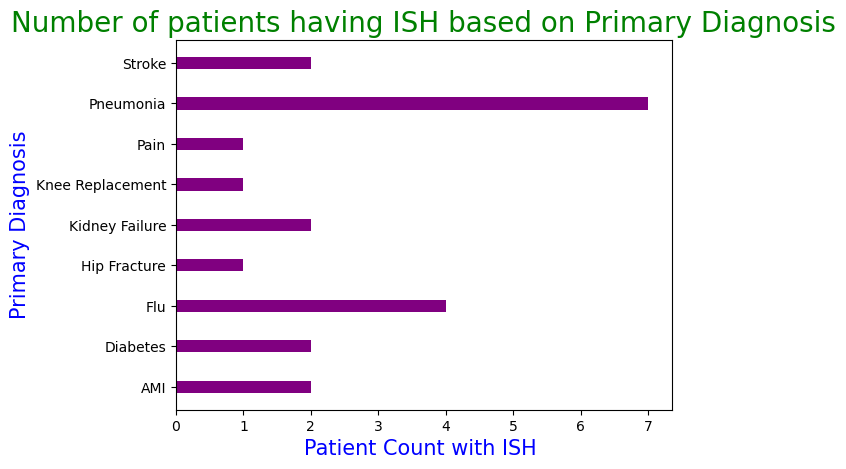

In [47]:
#isolated systolic hypertension is when the systolic bp >= 140 and diastolic bp <=90
df_ISH = df_AV[(df_AV['BloodPressureSystolic']>=140) & (df_AV['BloodPressureDiastolic']<=90)]

#merging two sheets
df_PD_merg = pd.merge(df_D, df_ISH, left_on = 'PatientID', right_on = 'PatientMRN')

df_ISH_PD = df_PD_merg.groupby('PrimaryDiagnosis')['PatientID'].count().reset_index(name='Patient_Count')
y=df_ISH_PD.Patient_Count
x=df_ISH_PD.PrimaryDiagnosis

plt.barh(x,y,data = df_ISH_PD,color="purple",height=0.3)
plt.ylabel("Primary Diagnosis",fontsize=15, color = 'blue')
plt.xlabel("Patient Count with ISH ",fontsize=15,color = 'blue')

plt.title('Number of patients having ISH based on Primary Diagnosis', color = 'green',fontsize=20)
plt.show()

# Pulse Rate Analysis

Text(0.5, 1.0, 'Pulse Rate Analysis')

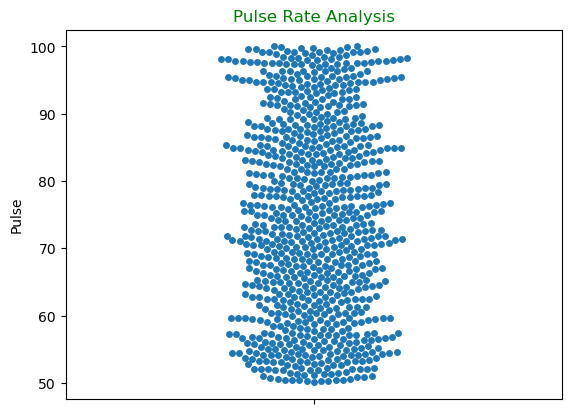

In [48]:
sns.swarmplot(data=df_AV["Pulse"])
plt.title("Pulse Rate Analysis",color='green')

# Graph with most common diagnosis among patients Admitted

<Axes: title={'center': '\n The most common diagnosis'}, xlabel='PrimaryDiagnosis', ylabel='Patients Count'>

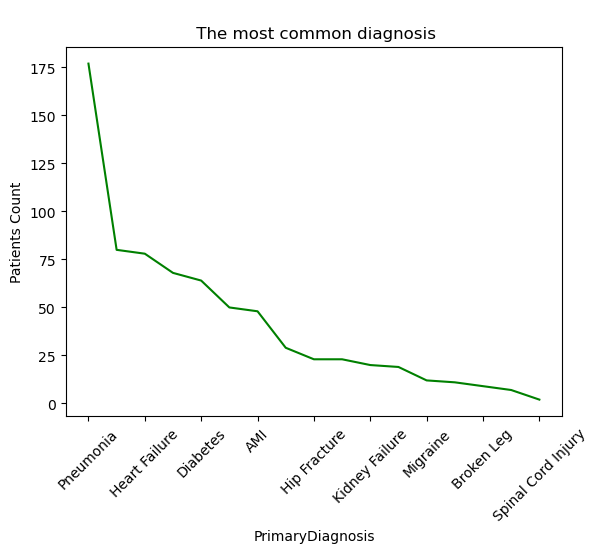

In [49]:
Diagnosis=df_RR.groupby(['PrimaryDiagnosis'])['PatientID'].count().sort_values(ascending=False)
Diagnosis.plot(rot=45,ylabel='Patients Count',title='\n The most common diagnosis', color='green')

# Plot a pie chart month wise for fever and flu

Month
1    64
2    35
Name: PatientID, dtype: int64


<Axes: title={'center': 'Distribution of Fever and Flu'}, ylabel='PatientID'>

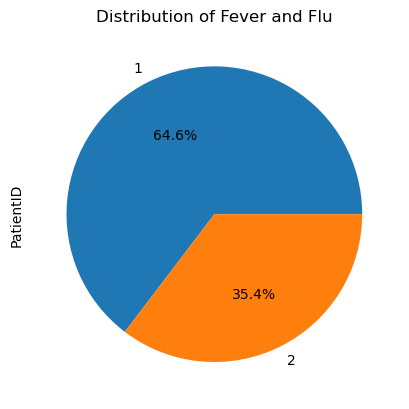

In [50]:
FF= df_RR.query("PrimaryDiagnosis=='Fever' or PrimaryDiagnosis=='Flu'")

FF['Month']=pd.DatetimeIndex(FF['AdmissionDate']).month

FF=FF.groupby('Month')['PatientID'].count()

print (FF)

FF.plot.pie(autopct='%1.1f%%',title= "Distribution of Fever and Flu")

# The EDVisit After Discharge rate

In [51]:
EDV_Sum = df_RR.EDVisitAfterDischargeFlag.sum()
EBV_AICount = df_RR.AdmissionID.count()
EDVD_Rate = round(EDV_Sum / EBV_AICount, 2)
print ('The EDVisit After Discharge rate is :',EDVD_Rate)

The EDVisit After Discharge rate is : 0.47


# Graphical Representation of EDVisit After Discharge rate by Primary Diagnosis

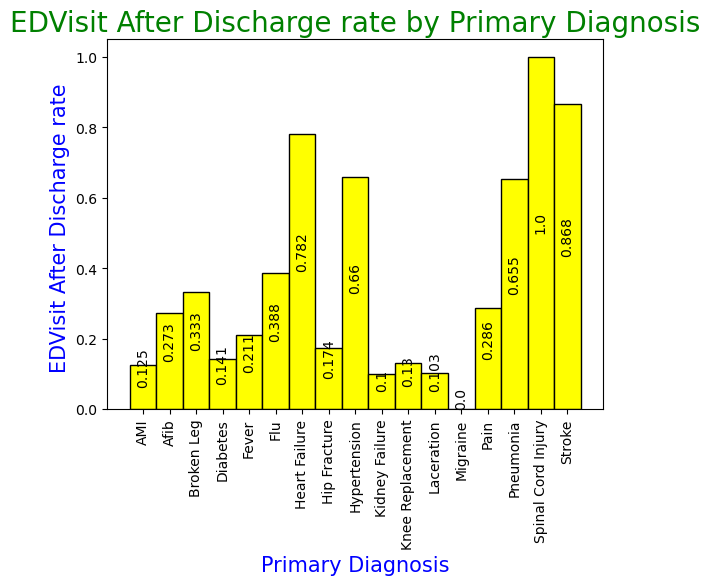

In [52]:
df_EDV_Sum = df_RR.groupby('PrimaryDiagnosis')['EDVisitAfterDischargeFlag'].sum().reset_index(name='EDV_SUM')
      
df_EBV_AICount = df_RR.groupby('PrimaryDiagnosis')['AdmissionID'].count().reset_index(name='EDV_Count')

df_EDVD_Rate = df_EDV_Sum.EDV_SUM / df_EBV_AICount.EDV_Count
df_EDVD_Rate=df_EDVD_Rate.round(decimals=3)

#defining label
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i]/2,y[i],rotation=90, ha = 'center', va='bottom')

        
x = df_EDV_Sum.PrimaryDiagnosis
y = df_EDVD_Rate

plt.bar(x,y,color="yellow", edgecolor = "black", width=1)
plt.xticks(rotation=90, horizontalalignment="center")
plt.xlabel("Primary Diagnosis",fontsize=15, color = 'blue')
plt.ylabel("EDVisit After Discharge rate ",fontsize=15,color = 'blue')
plt.title(('EDVisit After Discharge rate by Primary Diagnosis'), fontsize=20,
          color="green")

addlabels(x,y)
plt.show()

# Tree Map for Average Expected Mortality by Primary Diagnosis

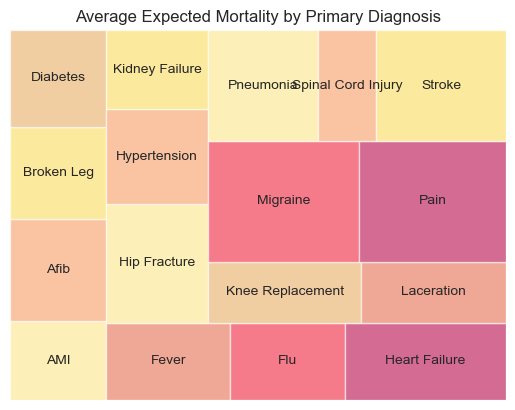

In [53]:
#calculate the avg excpected mortality by PD
EMORT_avg = df_RR.groupby('PrimaryDiagnosis')['ExpectedMortality'].mean().reset_index(name='Avg_EMortality')
#print (EMORT_avg)

sns.set_style(style="whitegrid") # set seaborn plot style
sizes= EMORT_avg["Avg_EMortality"].values # proportions of the categories
label=EMORT_avg['PrimaryDiagnosis']
colors=['#fae588','#f79d65','#f9dc5c','#e8ac65','#e76f51','#ef233c','#b7094c'] #color palette
sq.plot(sizes=sizes, label=label, alpha=0.6,color=colors).set(title='Average Expected Mortality by Primary Diagnosis')
plt.axis('off')
plt.show()

# New Patients trend by Department Specialty

<Axes: title={'center': 'New Patient by Department Specialty'}, xlabel='ProviderSpecialty', ylabel='New Patient Count'>

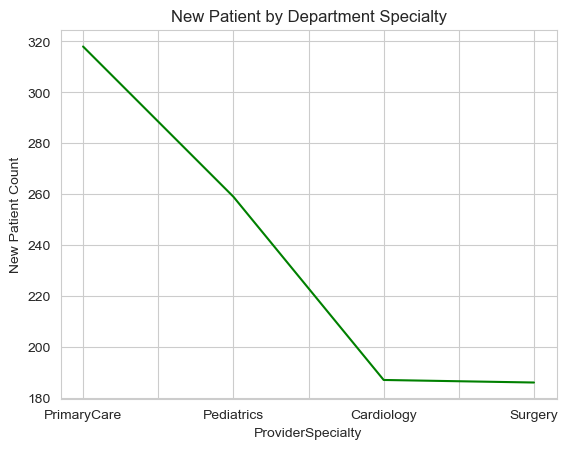

In [54]:
VTN = df_AV.query("VisitType=='New'")
#print (VTN)

#Joining Tables 'Patients' and 'EDVisits'
VTN=df_AV.merge(df_P,on='ProviderID',how='inner')

VTN=VTN.groupby('ProviderSpecialty')['PatientMRN'].count().sort_values(ascending=False)

VTN.plot.line(ylabel='New Patient Count',title='New Patient by Department Specialty',color='green')

# The time spent in ED Department for each visit.

In [55]:

df_EDV['TimeSpent']=df_EDV['EDDischargeTime']-df_EDV['VisitDate'] #Finding The Time Spent
df_EDV



EDVisitID  PatientID               VisitDate         EDDischargeTime  \
0             1          1 2020-01-01 00:00:00.000 2020-01-01 11:20:22.924   
1            12         12 2020-01-01 02:45:40.302 2020-01-02 02:00:00.517   
2            13         13 2020-01-01 03:09:24.701 2020-01-01 05:00:20.852   
3            14         14 2020-01-01 03:12:19.349 2020-01-01 04:32:29.142   
4            15         15 2020-01-01 03:46:32.698 2020-01-01 06:24:52.741   
...         ...        ...                     ...                     ...   
1194       1183        929 2020-01-15 10:38:42.570 2020-01-16 02:31:52.023   
1195       1186        932 2020-01-15 11:52:37.540 2020-01-16 10:19:41.570   
1196       1187        933 2020-01-15 12:11:11.678 2020-01-15 16:41:15.223   
1197       1188        934 2020-01-15 12:21:46.006 2020-01-15 18:32:21.060   
1198       1189        935 2020-01-15 12:51:14.875 2020-01-15 23:40:41.456   

      Acuity ReasonForVisit EDDisposition              TimeSpent  
0          1   Stomach Ache      Admitted 0 days 11:20:22.924000  
1          2       Migraine      Admitted 0 days 23:14:20.215000  
2          3   Stomach Ache      Admitted 0 days 01:50:56.151000  
3          3       Migraine      Admitted 0 days 01:20:09.793000  
4          3     Chest Pain      Admitted 0 days 02:38:20.043000  
...      ...            ...           ...                    ...  
1194       4     Chest Pain    Discharged 0 days 15:53:09.453000  
1195       1      Pneumonia    Discharged 0 days 22:27:04.030000  
1196       1      Pneumonia    Discharged 0 days 04:30:03.545000  
1197       1      Pneumonia    Discharged 0 days 06:10:35.054000  
1198       1      Pneumonia    Discharged 0 days 10:49:26.581000  

[1199 rows x 8 columns]

# Number of patients based on service and primary diagnosis.

In [56]:
df_RR.groupby(["Service","PrimaryDiagnosis"])["PatientID"].count()

Service           PrimaryDiagnosis  
Cardiology        AMI                   40
                  Afib                  10
                  Broken Leg             3
                  Flu                    2
                  Heart Failure         39
                  Kidney Failure         1
General Medicine  Broken Leg             3
                  Diabetes              38
                  Fever                 13
                  Flu                   54
                  Hypertension          35
                  Kidney Failure        12
                  Laceration            21
                  Pneumonia             67
                  Stroke                20
Hospitalist       AMI                    1
                  Broken Leg             3
                  Diabetes              26
                  Fever                  3
                  Flu                   19
                  Hypertension           6
                  Kidney Failure         6
                 

# Pair plot on whole dataframe by taking parameter "hue" as EDDisposition.

Text(-0.5, 3.1, 'Pair plot of EDDisposition')

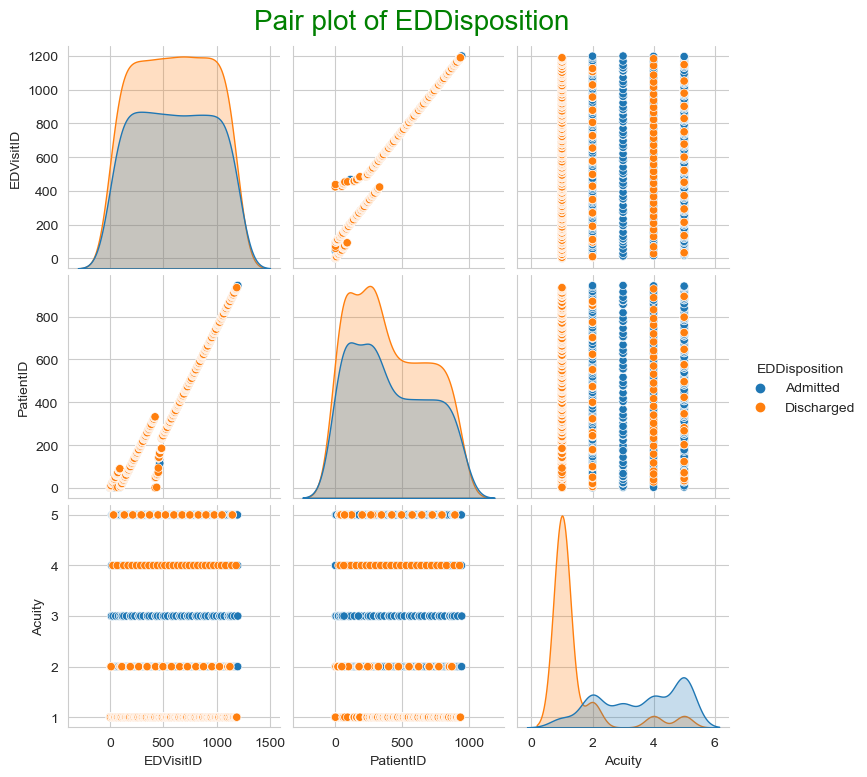

In [57]:
sns.pairplot(df_EDV, hue="EDDisposition")
plt.title("Pair plot of EDDisposition",color='green',y=3.1,x=-0.5,fontsize=20)

# Bar chart between expectedLOS & Primary diagnosis.

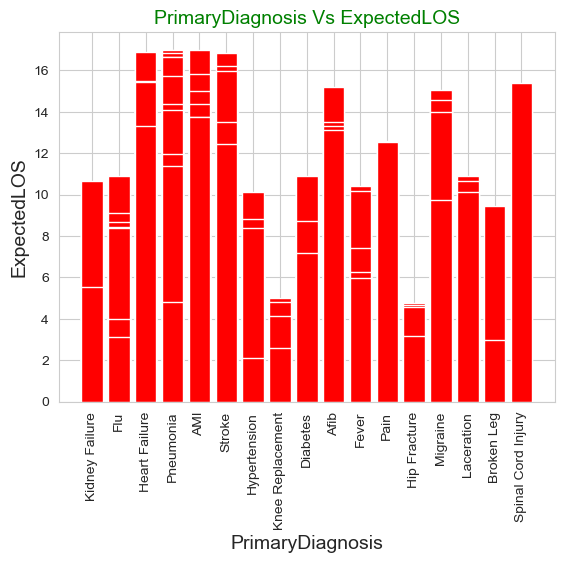

In [58]:


plt.bar(df_RR['PrimaryDiagnosis'], height=df_RR['ExpectedLOS'], color='red')
plt.title('PrimaryDiagnosis Vs ExpectedLOS',color='green' ,fontsize=14)

plt.xlabel('PrimaryDiagnosis', fontsize=14)
plt.ylabel('ExpectedLOS', fontsize=14)
plt.grid('true')

plt.xticks(rotation=90)

plt.show()

# Last name of the patients, by getting the first name from the user.

In [59]:
Fname = input("Enter The First name of the  Patients: ")
df_PA_NEW=(df_PA.loc[df_PA['FirstName'] == Fname])
print(df_PA_NEW['LastName'])
if df_PA_NEW.empty:
    print ('Patient does not exist')

Enter The First name of the  Patients: Ted
28      Scott
32    Stanley
33        Hue
Name: LastName, dtype: object


# List of patients whose ExpectedLOS is greater than the value given by the user.

In [60]:
#Enter the user value
value = input("Enter user value")

# Comparing the value ExpectedLOS with user value
Comp = df_D.loc[(df_D['ExpectedLOS']> float(value))]


print('List Of Patients whose ExpectedLOS is greater than ' +str(value)+' day(s) is  :',  len(Comp.index))

Enter user value20
List Of Patients whose ExpectedLOS is greater than 20 day(s) is  : 0


# Using Sunburst chart displaying the providers name by thier provider speciality, considering thier experience.

In [61]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
import datetime
from datetime import date,datetime
import re
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
from wordcloud import WordCloud, STOPWORDS
import plotly.express as px
import plotly.graph_objects as go
import imageio
import seaborn as sns
import imageio
import time
from time import mktime
import warnings
#Reading the Dataset
xls = pd.ExcelFile('HospitalDatabase.xlsx')
#Reading the ReAdmissionRegistry sheet
df_RR = pd.read_excel(xls, 'ReAdmissionRegistry')
#Reading the Patients sheet
df_PA = pd.read_excel(xls, 'Patients')
#Reading the EDVisits sheet
df_EDV= pd.read_excel(xls, 'EDVisits')
#Reading the AmbulatoryVisits sheet
df_AV = pd.read_excel(xls, 'AmbulatoryVisits')
#Reading the Discharges sheet
df_D = pd.read_excel(xls, 'Discharges')
#Reading the Providers sheet
df_P= pd.read_excel(xls, 'Providers')
#Reading the EDUnique sheet
df_EDU = pd.read_excel(xls, 'EDUnique')
warnings.filterwarnings("ignore")
df_P= pd.read_excel(xls, 'Providers')
# Calculating the experience
Experience = datetime.today().year - df_P['ProviderDateOnStaff'].dt.year
df_P['Experience'] = Experience
df_PA

#Sunburst Chart
fig = px.sunburst(df_P ,
                path = ['ProviderName','ProviderSpecialty'],
                values = 'Experience',
                title = 'Sunburst chart for providersname by their providerspeciality',
                 width = 750, height = 750)

fig.show()

# A subplot on x = np.arange(0, 10, 0.1) , y = np.sin(np.pi * x) + x with 2 rows & 2 columns with object oriented approach.

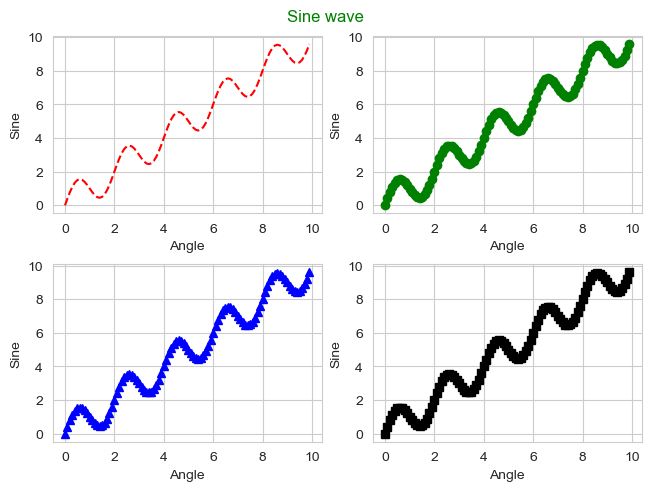

In [62]:
x = np.arange(0, 10, 0.1)
y = np.sin(np.pi * x) + x

fig, axs = plt.subplots(nrows=2 , ncols=2, constrained_layout=True)

fig.suptitle ('Sine wave' , fontsize=12,color='green')

axs[0][0].plot(x,y,'r--')
axs[0][1].plot(x,y,'g o')
axs[1][0].plot(x,y,'b ^')
axs[1][1].plot(x,y,'k s')


for ax in axs.flat:
    ax.set(xlabel='Angle', ylabel='Sine')

plt.show()

# Number of patients based on ReasonForVisit and EDDisposition (using stack/unstack functions).

###### Approach 1 : Based on EDUnique

In [63]:
#Reading the EDUnique sheet
df_EDU = pd.read_excel(xls, 'EDUnique')

#Finding no of patients based on Reason for visit and EDDisposition
df_EDU = df_EDU.groupby(["ReasonForVisit","EDDisposition"]).size().reset_index(name ='No_of_Patients')
#print(df_EDU)

#Using stack function
stack_df_EDU=df_EDU.stack(level=0)
print('STACKED OUTPUT')
print(stack_df_EDU)

#Using unstacked function
unstack_df_EDU = stack_df_EDU.unstack() .unstack() .unstack()
print('UNSTACKED OUTPUT')
print(unstack_df_EDU)

STACKED OUTPUT
0   ReasonForVisit        Accident
    EDDisposition         admitted
    No_of_Patients              37
1   ReasonForVisit        Bleeding
    EDDisposition         Admitted
                          ...     
26  EDDisposition       Discharged
    No_of_Patients              32
27  ReasonForVisit    Stomach Ache
    EDDisposition       discharged
    No_of_Patients              75
Length: 84, dtype: object
UNSTACKED OUTPUT
                      0         1           2             3             4   \
ReasonForVisit  Accident  Bleeding    Bleeding  Car Accident  Car Accident   
EDDisposition   admitted  Admitted  Discharged      Admitted      admitted   
No_of_Patients        37        14          11            15             1   

                        5           6           7           8         9   ...  \
ReasonForVisit  Chest Pain  Chest Pain  Chest Pain       Fever     Fever  ...   
EDDisposition     Admitted    admitted  discharged  Discharged  admitted  ...   
N

###### Approach 2 : Based on EDVisit

In [64]:
#Reading the EDVisit sheet
df_EDV = pd.read_excel(xls, 'EDVisits')

#Finding no of patients based on Reason for visit and EDDisposition
df_EDV = df_EDV.groupby(["ReasonForVisit","EDDisposition"]).size().reset_index(name ='No_of_Patients')
#print(df_EDU)

#Using stack function
stack_df_EDV=df_EDV.stack(level=0)
print ('')
print('STACKED OUTPUT')
print ("")
print(stack_df_EDV)

#Using unstacked function
unstack_df_EDV = stack_df_EDV.unstack() .unstack() .unstack()
print("")
print('UNSTACKED OUTPUT')
print("")
print(unstack_df_EDV)


STACKED OUTPUT

0   ReasonForVisit               Accident
    EDDisposition                Admitted
    No_of_Patients                     39
1   ReasonForVisit               Bleeding
    EDDisposition                Admitted
    No_of_Patients                     16
2   ReasonForVisit               Bleeding
    EDDisposition              Discharged
    No_of_Patients                     15
3   ReasonForVisit           Car Accident
    EDDisposition                Admitted
    No_of_Patients                     17
4   ReasonForVisit             Chest Pain
    EDDisposition                Admitted
    No_of_Patients                     94
5   ReasonForVisit             Chest Pain
    EDDisposition              Discharged
    No_of_Patients                     15
6   ReasonForVisit                  Cough
    EDDisposition              Discharged
    No_of_Patients                      1
7   ReasonForVisit                  Fever
    EDDisposition                Admitted
    No_of_Patient

# Creating a dataframe with date and time as columns, where the values are the discharge time from readmissionregistry sheet.

In [65]:
#data from discharge time from readmissionregistry

tabledate = pd.to_datetime(df_RR['DischargeDate']).dt.date
tabletime = pd.to_datetime(df_RR['DischargeDate']).dt.time


table = {'Date' : tabledate,'Time' : tabletime}
#print (table)

#creating dataframe
dataframe = pd.DataFrame(table)
dataframe

Date             Time
0    2018-01-04  19:59:31.391000
1    2018-01-04  21:28:51.898000
2    2018-01-04  22:28:23.672000
3    2018-01-05  05:47:04.933000
4    2018-01-05  14:18:30.029000
..          ...              ...
715  2018-03-07  21:22:10.061000
716  2018-03-08  02:43:18.749000
717  2018-03-08  09:27:18.377000
718  2018-03-10  06:06:12.068000
719  2018-03-10  20:38:30.568000

[720 rows x 2 columns]

# Count of patients based on primary diagnosis.

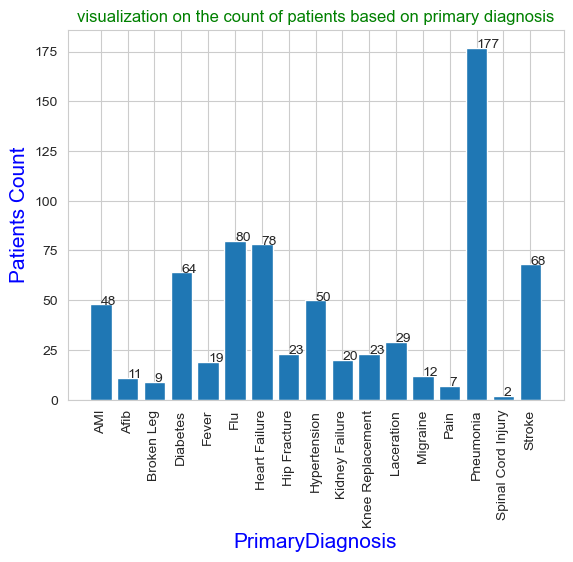

In [66]:
temp1 = df_D.groupby('PrimaryDiagnosis')['PatientID'].count().reset_index(name= 'Patientcounts')

def addlabels(x1,y1):
       for i in range(len(x1)):
               plt.text(i,y1[i],y1[i])

x1= temp1.PrimaryDiagnosis
y1= temp1.Patientcounts

plt.bar( x1 , y1, data = temp1)

plt.xticks(rotation=90, horizontalalignment="center")
plt.xlabel("PrimaryDiagnosis",fontsize=15, color = 'blue')
plt.ylabel("Patients Count",fontsize=15,color = 'blue')

plt.title ('visualization on the count of patients based on primary diagnosis',color='green')
addlabels(x1,y1)
plt.show()

# Bar chart on service & expected length of stay.

Service
Cardiology          1162.001587
General Medicine    1601.794448
Hospitalist          789.656536
ICU                 1911.151100
Neurology            727.713724
Orthopeadics         161.386799
Name: ExpectedLOS, dtype: float64


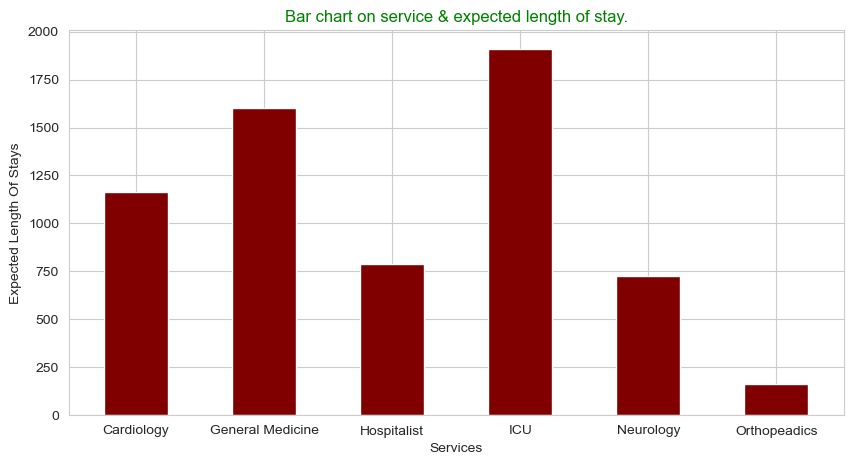

In [67]:
df_graph = df_RR.groupby(['Service'])['ExpectedLOS'].sum()
print(df_graph)
data = df_graph.to_dict()
services = list(data.keys())
lengthOfStays = list(data.values())

fig = plt.figure(figsize = (10, 5))

plt.bar(services, lengthOfStays, color ='maroon', width = 0.5)

plt.xlabel("Services")
plt.ylabel("Expected Length Of Stays")
plt.title("Bar chart on service & expected length of stay.",color='green')
plt.show()

# Count of Spanish Speaking patients.

In [68]:
df_PA[df_PA['Language'] == 'Spanish']['PatientID'].count()

110

# Boxplot on ExpectedLOS by taking service into account.

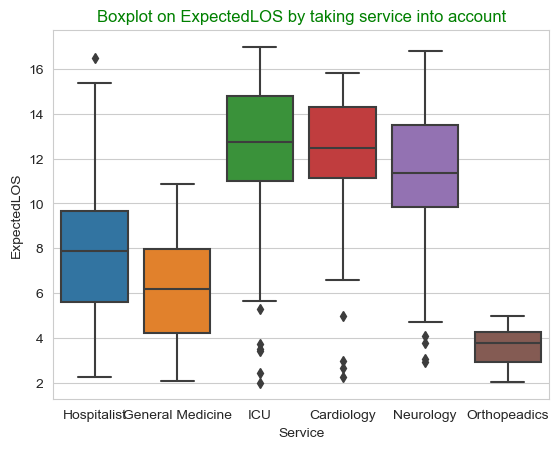

In [69]:
sns.boxplot(data=df_RR, x="Service", y="ExpectedLOS")
plt.title("Boxplot on ExpectedLOS by taking service into account",color='green')
plt.show()

# Code snippet to print different ProviderSpecialty ( using groupby).

In [70]:
df_P.groupby(["ProviderSpecialty"])['ProviderSpecialty'].count()

ProviderSpecialty
Cardiology      8
Pediatrics      9
PrimaryCare    16
Surgery         7
Name: ProviderSpecialty, dtype: int64

# The patient count in the ReAdmissionRegistry.

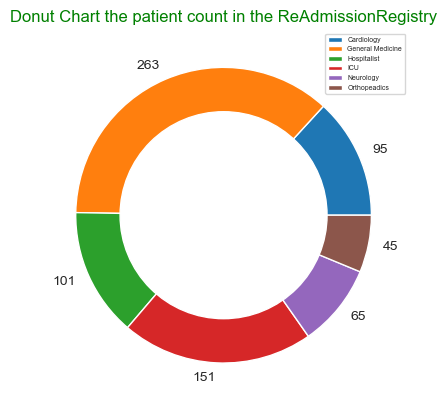

In [71]:
df_size = df_RR.groupby(['Service'])['PatientID'].count()
data = df_size.to_dict()
services = list(data.keys())
count = list(data.values())
#print(df_size)

plt.pie(count, labels= df_size)
#plt.show()
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('Donut Chart the patient count in the ReAdmissionRegistry',color='green')

# Add Legends
plt.legend(services, loc="upper right", fontsize='5')
# show the graph
plt.show()

# The records where the ExpectedLos is greater than the difference between the max and min ExpectedLos.

In [72]:
ELOS_diff = df_RR['ExpectedLOS'].max() - df_RR['ExpectedLOS'].min()
df_RR[df_RR['ExpectedLOS'] > ELOS_diff]

AdmissionID  PatientID AdmissionDate           DischargeDate  \
6            549          8    2018-01-01 2018-01-07 15:39:25.987   
18           252         19    2018-01-01 2018-01-17 14:13:23.627   
31           550         27    2018-01-02 2018-01-13 07:34:46.603   
46           391         41    2018-01-03 2018-01-10 00:57:05.440   
64           609         59    2018-01-04 2018-01-09 01:18:34.182   
88           144         83    2018-01-05 2018-01-17 11:00:10.366   
95           145         90    2018-01-06 2018-01-15 03:16:35.614   
100          444         95    2018-01-06 2018-01-19 02:57:34.514   
113          445        108    2018-01-07 2018-01-22 06:49:20.132   
118          114        113    2018-01-08 2018-01-14 22:04:11.532   
140          398        134    2018-01-10 2018-01-15 16:43:47.026   
144           10        139    2018-01-10 2018-01-23 02:52:59.927   
182          368        178    2018-01-14 2018-01-18 13:44:53.072   
197           68        194    2018-01-15 2018-01-24 13:02:54.142   
201          369        198    2018-01-15 2018-01-31 14:28:07.437   
210          161        208    2018-01-16 2018-01-31 13:52:54.519   
217           70        215    2018-01-17 2018-01-26 11:36:41.083   
224          372        221    2018-01-18 2018-01-21 01:21:00.624   
233          406        230    2018-01-18 2018-02-01 20:55:30.903   
263          459        259    2018-01-21 2018-01-25 10:56:22.658   
266          325        262    2018-01-21 2018-01-28 07:42:51.034   
268          219        264    2018-01-21 2018-02-03 13:01:46.214   
288          221        284    2018-01-23 2018-02-02 15:16:54.688   
308          413        302    2018-01-25 2018-01-29 15:37:42.226   
313          131        307    2018-01-25 2018-02-06 07:32:54.294   
335          616        329    2018-01-27 2018-02-08 12:48:19.071   
344          173        338    2018-01-28 2018-01-31 09:33:18.479   
357          383        351    2018-01-29 2018-02-01 13:51:43.552   
358          174        352    2018-01-29 2018-02-02 21:21:45.388   
361          280        355    2018-01-29 2018-02-04 06:00:18.953   
371          384        365    2018-01-30 2018-02-03 21:40:45.505   
389          670        406    2018-01-31 2018-02-16 14:33:25.110   
421          623        438    2018-02-03 2018-02-15 19:59:54.262   
431          473        448    2018-02-04 2018-02-16 12:02:18.116   
441          474        458    2018-02-05 2018-02-15 23:58:18.113   
445          626        462    2018-02-06 2018-02-12 07:25:43.824   
453          676        470    2018-02-06 2018-02-21 08:09:43.432   
469          477        486    2018-02-08 2018-02-16 08:36:20.182   
473           39        490    2018-02-08 2018-02-22 10:01:24.704   
479          535        496    2018-02-09 2018-02-12 14:44:45.232   
515           42        533    2018-02-11 2018-02-24 12:10:12.347   
525          431        543    2018-02-12 2018-02-19 11:04:49.046   
542          295        560    2018-02-13 2018-02-26 18:17:22.826   
568           99        587    2018-02-15 2018-02-24 06:57:25.143   
569          297        588    2018-02-15 2018-02-26 14:46:54.780   
578          100        597    2018-02-16 2018-02-25 00:37:27.040   
626          505        646    2018-02-18 2018-03-04 04:54:33.917   
632          488        652    2018-02-19 2018-02-22 23:14:27.662   
643          248        663    2018-02-19 2018-02-28 15:33:40.216   
646          518        666    2018-02-19 2018-03-02 10:50:39.029   
647          564        667    2018-02-19 2018-03-02 15:41:36.457   
667          565        687    2018-02-20 2018-03-04 05:12:27.379   
687          691        709    2018-02-21 2018-03-01 08:44:33.655   
708          586        731    2018-02-22 2018-03-03 21:51:47.920   

    DischargeDisposition      Service    PrimaryDiagnosis  ExpectedLOS  \
6                   Home  Hospitalist           Pneumonia    16.472257   
18                  Home  Hospitalist              Stroke    

# Service which had the lowest count of Expected Mortality?

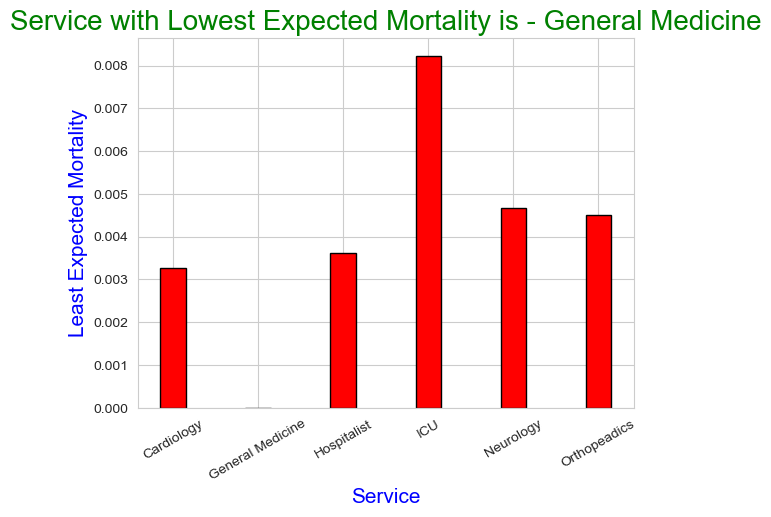

In [73]:
#calculate min EM for each service
Service_EM = df_RR.groupby('Service')['ExpectedMortality'].min().reset_index(name='Min_EM')
#sorting
df_RR_sort = Service_EM.sort_values(['Min_EM']).reset_index(drop = True)
#service with min count
Min_Ser = df_RR_sort.iloc[0,0]

x = Service_EM.Service
y = Service_EM.Min_EM
plt.bar(x,y,color="red",data = df_RR_sort, edgecolor = "black", width=0.3)
plt.xticks(rotation=30, horizontalalignment="center")
plt.xlabel("Service",fontsize=15, color = 'blue')
plt.ylabel("Least Expected Mortality",fontsize=15,color = 'blue')
plt.title((f'Service with Lowest Expected Mortality is - {Min_Ser}'), fontsize=20,
          color="green")
plt.show()

# Reason of visit that has maximum mortality rate.

In [74]:
df_RR = pd.read_excel(xls, 'ReAdmissionRegistry')
df_EDV= pd.read_excel(xls, 'EDVisits')
EM_max = df_RR['ExpectedMortality'].max()
print('')
print ('Maximum Mortality Rate is', EM_max)

#merging two sheets
df_merg = df_EDV[["PatientID","ReasonForVisit"]].merge(df_RR[["PatientID",'ExpectedMortality']], on='PatientID', how ="right")

# creating a new file
#df_merg.to_excel("Merged_EM.xlsx", index = False)
print('')
print('')
print('The Reson of Visit with Maximun Mortality Rate is :')
df_merg[df_merg.ExpectedMortality == EM_max]


Maximum Mortality Rate is 0.9899452598970535


The Reson of Visit with Maximun Mortality Rate is :


PatientID ReasonForVisit  ExpectedMortality
816        572      Pneumonia           0.989945

# The average LOS based on Service and Discharge Disposition(Maintaining the column Hierarchy).

In [75]:
df_RR.groupby(['Service','DischargeDisposition'])['ExpectedLOS'].mean().reset_index(name='Avg_LOS')

Service DischargeDisposition    Avg_LOS
0         Cardiology              Expired   9.202626
1         Cardiology                 Home  12.864936
2         Cardiology             Transfer  11.818403
3   General Medicine              Expired   5.874003
4   General Medicine                 Home   6.105696
5   General Medicine             Transfer   6.116124
6        Hospitalist              Expired   6.775636
7        Hospitalist                 Home   8.009046
8        Hospitalist             Transfer   5.701389
9                ICU              Expired   9.919063
10               ICU                 Home  13.451158
11               ICU             Transfer  11.989238
12         Neurology              Expired   9.384312
13         Neurology                 Home  12.538859
14         Neurology             Transfer  11.469198
15      Orthopeadics              Expired   3.943883
16      Orthopeadics                 Home   3.508337
17      Orthopeadics             Transfer   4.842255

# Adding column 'Age' in Patient table.

In [76]:
from datetime import datetime, date
dob = df_PA['DateOfBirth']

#defining age column
def age(born):
    born = pd.to_datetime(born).date()
    today = date.today()
    return today.year - born.year - ((today.month,
                                      today.day) < (born.month,
                                                    born.day))

df_PA['Age'] = dob.apply(age)

df_PA

PatientID FirstName  LastName             DateOfBirth Gender  \
0            1     Lanni       Sue 1960-01-01 00:00:00.000   Male   
1            2       Far     Myers 1985-11-15 02:08:42.090   Male   
2            3   Devlin    Michael 1976-04-15 02:52:09.762   Male   
3            4   Carmine     Texas 1968-10-15 03:32:13.635   Male   
4            5     Tann       Bama 1962-05-01 19:12:58.950   Male   
..         ...       ...       ...                     ...    ...   
940        941       Wat   Fideler 1986-05-26 00:01:19.761   Male   
941        942    Wandie  Baythrop 1970-06-10 21:41:03.814   Male   
942        943   Diahann   Smeeton 1983-01-08 21:49:27.884   Male   
943        944  Panchito   Sharple 1963-06-05 07:57:05.569   Male   
944        945     Walsh    Calvie 1972-08-06 03:40:03.454   Male   

                       Race Language  Age  
0                     White  English   64  
1                     White  English   38  
2                     White  English   48  
3                     White  English   55  
4                     White  English   62  
..                      ...      ...  ...  
940  Black/African-American  English   38  
941  Black/African-American  English   54  
942  Black/African-American  English   41  
943  Black/African-American  English   61  
944  Black/African-American  English   52  

[945 rows x 8 columns]

# 24.Using arrays and loops,the count of patients based on gender.

In [77]:
#convert dataframe to numpy array
arr_PA = df_PA.to_numpy()

#select gender column
gender = arr_PA[ :,4]

MaleCnt = sum(1 for i in gender if i == 'Male')
print ("Number of Male Patients : ", str(MaleCnt))

FemaleCnt = sum(1 for i in gender if i == 'Female')
print ("Number of Female Patients : ", str(FemaleCnt))

Number of Male Patients :  537
Number of Female Patients :  408


# Creating bins to segregate Patients with 'Mild Hypertension','Moderate ','High Hypertension','Severe Hypertension'.

In [78]:
####Approach 1

df_AV_new=df_AV.dropna(subset=['BloodPressureSystolic'])
bins=[120,140,160,180,190]
my_labels=['Mild Hypertension','Moderate ','High Hypertension','Severe Hypertension']
my_data = pd.cut(df_AV_new['BloodPressureSystolic'],bins,labels=my_labels)
pd.concat([d.reset_index(drop=True) for d in [df_AV['PatientMRN'],df_AV['BloodPressureSystolic'], my_data]], axis=1).head(20)

PatientMRN BloodPressureSystolic BloodPressureSystolic
0          840                 188.0   Severe Hypertension
1          820                 179.0     High Hypertension
2          879                 133.0     Mild Hypertension
3          884                 132.0     Mild Hypertension
4           32                 131.0     Mild Hypertension
5          894                 121.0     Mild Hypertension
6          875                 175.0     High Hypertension
7          832                 177.0     High Hypertension
8          896                 140.0     Mild Hypertension
9          878                 183.0   Severe Hypertension
10         816                 136.0     Mild Hypertension
11         833                 122.0     Mild Hypertension
12         829                 156.0             Moderate 
13         813                 140.0     Mild Hypertension
14         845                 173.0     High Hypertension
15         879                 151.0             Moderate 
16         859                 137.0     Mild Hypertension
17         873                 145.0             Moderate 
18         887                 131.0     Mild Hypertension
19         862                 127.0     Mild Hypertension

In [79]:
####Approach 2
df_AV_new=df_AV.dropna(subset=['BloodPressureSystolic'])
bins=[50,100,120,140,160]
my_labels=['Mild Hypertension','Moderate ','High Hypertension','Severe Hypertension']
my_data = pd.cut(df_AV_new['BloodPressureDiastolic'],bins,labels=my_labels)
pd.concat([d.reset_index(drop=True) for d in [df_AV['PatientMRN'],df_AV['BloodPressureDiastolic'], my_data]], axis=1).head(20)

PatientMRN BloodPressureDiastolic BloodPressureDiastolic
0          840             144.143427    Severe Hypertension
1          820             118.876808              Moderate 
2          879              98.749563      Mild Hypertension
3          884              98.001270      Mild Hypertension
4           32              85.115632      Mild Hypertension
5          894              57.692485      Mild Hypertension
6          875             132.883861      High Hypertension
7          832             146.238936    Severe Hypertension
8          896              74.519839      Mild Hypertension
9          878             122.982498      High Hypertension
10         816              84.555164      Mild Hypertension
11         833              84.021556      Mild Hypertension
12         829             123.295654      High Hypertension
13         813              90.357042      Mild Hypertension
14         845             106.084520              Moderate 
15         879             116.396246              Moderate 
16         859              72.756586      Mild Hypertension
17         873              96.075925      Mild Hypertension
18         887              74.163851      Mild Hypertension
19         862              66.406797      Mild Hypertension

# The distribution of expected mortality.

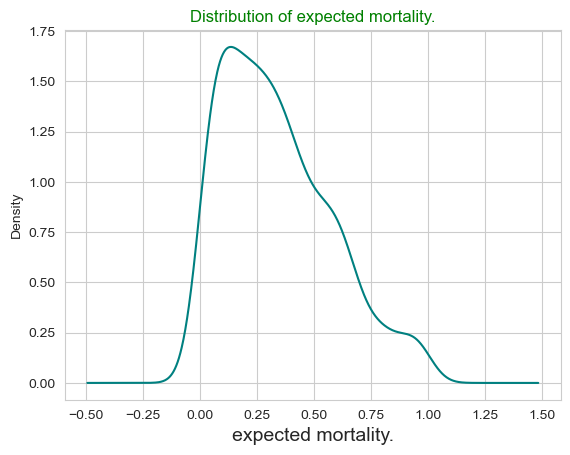

In [80]:
df_RR['ExpectedMortality'].plot(kind='kde',color='teal')
plt.title('Distribution of expected mortality.',color='green')
plt.xlabel('expected mortality.', fontsize=14)
plt.show()

# DepartmentID which has maximum number of visits scheduled.

In [81]:
df_AV.groupby(['VisitDepartmentID'])['VisitID'].count().sort_values().tail(1)

VisitDepartmentID
11    102
Name: VisitID, dtype: int64

# Visit type with maximum 'No Show'.

In [82]:
df_AV_new=df_AV[df_AV['VisitStatus'] == 'No Show'].max()
print("Visit type with maximum No Show is:: ", df_AV_new['VisitType'])

Visit type with maximum No Show is::  Telemedicine


# Demographic patients who are prone to get stroke?

###### Demgroapic by Race

In [83]:
df_RR_merg = df_PA[["PatientID","Gender","Race"]].merge(df_RR[["PatientID",
'PrimaryDiagnosis']], on = "PatientID", how = "right")
df_RR_New=(df_RR_merg.loc[df_RR_merg['PrimaryDiagnosis'] == 'Stroke'])
print ("Below Demographic patients are prone to get stroke are:")
df_RR_New.groupby(['Race'])[["PatientID"]].count().sort_values(by="PatientID",ascending=False).head(1)

Below Demographic patients are prone to get stroke are:


PatientID
Race                             
Black/African-American         40

###### Demgroapic by Gender

In [84]:
df_RR_merg = df_PA[["PatientID","Gender","Race"]].merge(df_RR[["PatientID",
'PrimaryDiagnosis']], on = "PatientID", how = "right")
df_RR_New=(df_RR_merg.loc[df_RR_merg['PrimaryDiagnosis'] == 'Stroke'])
print ("Below Demographic patients are prone to get stroke are:")
df_RR_New.groupby(['Gender'])[["PatientID"]].count().sort_values(by="PatientID",ascending=False).head(1)

Below Demographic patients are prone to get stroke are:


PatientID
Gender           
Female         36

###### Demogrophics by Age

In [85]:
#merging 'Patient' and 'ReAdmissionRegistry' DataFrames
df = pd.merge(df_PA,df_RR, on = ['PatientID'], how = 'inner')
df["DateOfBirth"] = pd.to_datetime(df["DateOfBirth"])
df["BirthYear"] = df["DateOfBirth"].dt.year #extracting Birth Year from DateOFBirth
df["AdmissionDate"] = pd.to_datetime(df["AdmissionDate"])
df["AdmissionYear"] = df["AdmissionDate"].dt.year #extracting year from AdmissionDate
#calculating Age
df["Age"] = df['AdmissionYear'] - df['BirthYear']

#filter the rows where PrimaryDiagnosis is Stroke
df_stroke = df[df["PrimaryDiagnosis"] == 'Stroke']
# count of PatientID group by Race,Gender and sorting it in descending order to get Maximum count of patients
df_stroke.groupby(['Age'])[["PatientID"]].count().sort_values(by="PatientID",ascending=False).head(1)


PatientID
Age           
57           6

# The details of the providers where providerId is between 11 and 20 and ProviderSpecialty is Surgery.

In [86]:
df_DETAILS=df_P.loc[((df_P['ProviderID'] >= 11) & (df_P['ProviderID'] <= 20) )
             & (df_P['ProviderSpecialty'] == 'Surgery')]
print (df_DETAILS.to_string(index=False))

 ProviderID    ProviderName ProviderSpecialty     ProviderDateOnStaff  Experience
         11    Kim Kimberly           Surgery 1998-05-10 14:47:29.468          26
         12        Sarah Ab           Surgery 1998-08-18 05:22:40.762          26
         13 Abigail Marriot           Surgery 1998-11-08 12:25:45.705          26
         14         Dave Yu           Surgery 1999-06-26 16:18:57.436          25
         15 Christian Saint           Surgery 2000-08-27 00:12:40.326          24
         16    Perry Pardon           Surgery 2001-02-13 11:49:17.862          23


# If patient's gender is Female, adding Ms.to the name and for male patients adding Mr. to the name.

In [87]:
# Add a new column and concatinate the male and female name with respective prefix

df_PA.loc[df_PA['Gender'] == 'Male','Fullname'] = 'Mr'+' '+ df_PA ['FirstName']+' '+df_PA ['LastName']
df_PA.loc[df_PA['Gender'] == 'Female','Fullname'] = 'Ms'+' '+ df_PA ['FirstName']+' '+df_PA ['LastName']
df_PA

PatientID FirstName  LastName             DateOfBirth Gender  \
0            1     Lanni       Sue 1960-01-01 00:00:00.000   Male   
1            2       Far     Myers 1985-11-15 02:08:42.090   Male   
2            3   Devlin    Michael 1976-04-15 02:52:09.762   Male   
3            4   Carmine     Texas 1968-10-15 03:32:13.635   Male   
4            5     Tann       Bama 1962-05-01 19:12:58.950   Male   
..         ...       ...       ...                     ...    ...   
940        941       Wat   Fideler 1986-05-26 00:01:19.761   Male   
941        942    Wandie  Baythrop 1970-06-10 21:41:03.814   Male   
942        943   Diahann   Smeeton 1983-01-08 21:49:27.884   Male   
943        944  Panchito   Sharple 1963-06-05 07:57:05.569   Male   
944        945     Walsh    Calvie 1972-08-06 03:40:03.454   Male   

                       Race Language  Age             Fullname  
0                     White  English   64         Mr Lanni Sue  
1                     White  English   38         Mr Far Myers  
2                     White  English   48   Mr Devlin  Michael  
3                     White  English   55     Mr Carmine Texas  
4                     White  English   62        Mr Tann  Bama  
..                      ...      ...  ...                  ...  
940  Black/African-American  English   38       Mr Wat Fideler  
941  Black/African-American  English   54   Mr Wandie Baythrop  
942  Black/African-American  English   41   Mr Diahann Smeeton  
943  Black/African-American  English   61  Mr Panchito Sharple  
944  Black/African-American  English   52      Mr Walsh Calvie  

[945 rows x 9 columns]

# Pie chart for services & expected LOS

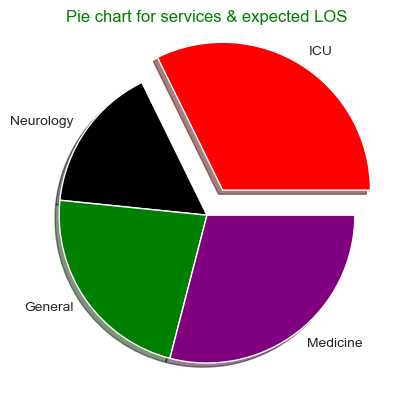

In [88]:
# Pie Chart for services & expected LOS with highest LOS explode

y = np.array([10,5,7,9])
myexplode=[0.2,0,0,0]
mylabels=["ICU", "Neurology", "General", "Medicine"]
mycolors=["red","black","green","PURPLE"]
print("")
plt.title("Pie chart for services & expected LOS",color='green')
plt.pie(y,explode=myexplode,labels=mylabels,colors=mycolors,shadow= True)
plt.show()

# Distribution of expected length of stay.

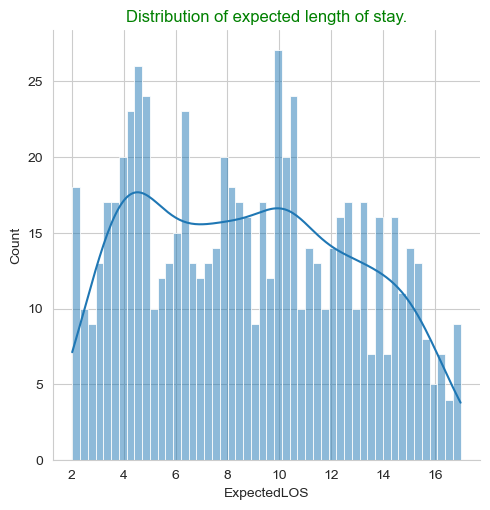

In [89]:
# Distribution Plot

sns.displot(df_D ['ExpectedLOS'], kde=True, bins=50)
plt.title('Distribution of expected length of stay.',color='green')
plt.show()

# WordCloud Chart with Reason For Visit.

In [90]:
#changing datatype of column Reason of visit to str
data1 = df_EDU.groupby(['ReasonForVisit'])['PatientID'].count()

#print (data1)

data2 =set(data1)
#print (type(data1) )


# Creating wordcloud chart
wordcloud = WordCloud(colormap=None, width=600, height=400, background_color='orange').generate_from_frequencies(data1)
plt.imshow(wordcloud)
plt.axis('off')
plt.title ('WordCloud chart with Reason for visit', color='green')

KeyError: 'Column not found: PatientID'

# Count of patients who are prone to hypertension crisis. (SBP>180 & DBP>120)

In [ ]:
# finding the count of hypertension patients
COP = df_AV.loc[(df_AV['BloodPressureSystolic'] > 180 ) & (df_AV['BloodPressureDiastolic'] > 120)]
print ('Count of Hypertension patients', COP['PatientMRN'].count())

# Data where actual LOS is greater than expected LOS.

In [ ]:
df_RR['lengthOfStay'] = (df_RR['DischargeDate'] - df_RR['AdmissionDate']).dt.days

df_RR[df_RR['lengthOfStay']>df_RR['ExpectedLOS']]

# Using loc, retrieving the firstname and lastname of patients between indices 101 and 200.

In [ ]:
print (df_PA.loc[:,["FirstName","LastName"]][101:200+1])

# Jointplot on expected mortality & expected length of stay.

In [ ]:
sns.jointplot(data=df_D, x="ExpectedLOS", y="ExpectedMortality")
plt.show()

# Age prone to get stroke.

In [ ]:
from datetime import datetime, date
df_merged = pd.merge(
    df_PA,
    df_RR,
    how="inner",
    on="PatientID"
)



#today = pd.to_datetime('today')
#df_merged['age'] = today.year - df_merged['DateOfBirth'].dt.year
df_merged['age'] = df_merged['AdmissionDate'].dt.year - df_merged['DateOfBirth'].dt.year
df_merged

#df_RR_New=(df_merged.loc[df_merged['PrimaryDiagnosis'] == 'PrimaryDiagnosis'])
stroke = df_merged[df_merged['PrimaryDiagnosis'] == 'Stroke']['age']
#print(stroke)
plt.title("Age of Stroke Patient vs Count",color='green')
sns.histplot(data=df_merged, x=stroke, shrink=.8)
plt.show()

# Calculating mortality by diagnosis.

In [ ]:
df_expired = df_D[df_D['DischargeDisposition'] == 'Expired']
df_size = df_expired.groupby(['PrimaryDiagnosis'])['PatientID'].count()

print(df_size)

# Displaying data by splitting age in 4 quartiles and labeling the quartiles.

In [ ]:
from datetime import datetime, date
dob = df_PA['DateOfBirth']

#defining age column
def age(born):
    born = pd.to_datetime(born).date()
    today = date.today()
    return today.year - born.year - ((today.month,
                                      today.day) < (born.month,
                                                    born.day))

df_PA['Age'] = dob.apply(age)
Age_Quartiles = pd.qcut(df_PA['Age'], 4, labels=['Young', 'Middle Age', 'Senior', 'Old'])
df_PA = df_PA.assign(Age_Quartile=Age_Quartiles.values)
df_PA

# Usage of Enumeration in Python with an example.

In [ ]:
#Enumeration is the function used to display items one by one
for count, enumerate_name in enumerate(df_PA.FirstName, 1):
    print(count, enumerate_name)

# Count of canceled status.

In [ ]:
df_Status = df_AV[(df_AV.VisitStatus == 'Canceled')]
df_Statuscount = pd.DataFrame(df_Status, index=None)
rows_canc = len(df_Statuscount.axes[0])
print("Number of Canceled Status : ", rows_canc)

# Patient details with maximum pulse pressure.

In [ ]:
#The top number (systolic) minus the bottom number (diastolic) is the pulse pressure
df_AV['PulsePr'] = df_AV['BloodPressureSystolic'] - df_AV['BloodPressureDiastolic']
PulsePrMax = df_AV.PulsePr.max()
print ('Maximum Pulse Pressure is',PulsePrMax)


#merging two sheets
df_PP_merg = pd.merge(df_PA, df_AV[['PatientMRN', 'PulsePr']] , left_on = 'PatientID', right_on = 'PatientMRN')
print('')
print('')
print('The Patient Details with High Pulse Pressure')
df_PP_merg[df_PP_merg.PulsePr == PulsePrMax]

# Heat map to show the correlation between the column values of Edvisits.

In [ ]:
import warnings
warnings.filterwarnings("ignore")

EDV_mx = df_EDV.corr()
sns.heatmap(EDV_mx, annot=True, cmap='magma',linecolor='White', linewidth=1)
plt.title('Heat map to show the correlation between the column values of Edvisits.',color='green')
plt.show()

# Graph by counting the no. of patients in each department.

In [ ]:
sns.countplot(x =df_AV['VisitDepartmentID'], data = df_AV)
plt.title('Counting the no. of patients in each department',color='green')
plt.show()

# Displaying patient details where "ReasonForVisit" is either 'Migraine' or 'Pneumonia' and Acuity is 2 or more

In [ ]:
df_EDV_merg = df_PA[["PatientID","FirstName","LastName","DateOfBirth","Gender","Race","Language"]].merge(df_EDV[["PatientID",
"ReasonForVisit","Acuity"]], on = "PatientID", how = "right")
df_EDV_NEW=df_EDV_merg.loc[((df_EDV['ReasonForVisit'] == 'Migraine') | (df_EDV_merg['ReasonForVisit'] == 'Pneumonia'))  & (df_EDV_merg['Acuity'] >2)]
df_EDV_NEW

# Taking the ReasonForVisit from user, find the number of patients admitted with that ReasonForVisit.

In [ ]:
Visit = input("Enter The  Reason of Visit: ")
df_EDV_NEW=(df_EDV.loc[df_EDV['ReasonForVisit'] == Visit])
print("Patient count" )
df_EDV_NEW[df_EDV_NEW['EDDisposition'] == 'Admitted']['PatientID'].count()

# Using indexing , loc to retrieving the row with maximum BloodPressureSystolic

In [ ]:
max_Id = df_AV['BloodPressureSystolic'].idxmax()
df_AV.loc[max_Id]

# Plotting a graph by multiplotting on the same canvas (Taking any set of x & y values).

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

line_1 = np.random.randint(low = 0, high = 50, size = 50)
line_2 = np.random.randint(low = -15, high = 100, size = 50)

fig, ax = plt.subplots()

ax.plot(line_1, color = 'green', label = 'X  ')
ax.plot(line_2, color = 'red', label = 'Y  ')
ax.legend(loc = 'upper left')
plt.title(' Multiplotting on the same canvas',color='green')
plt.show()

# Retrieving the row with minimum DBP using sorting technique.

In [ ]:
df_AV.sort_values(by=['BloodPressureDiastolic']).head(1)

# Replacing all the null values in ReadmissionFlag with 0.

In [ ]:
df_RR['ReadmissionFlag'] = df_RR['ReadmissionFlag'].fillna(0)
df_RR['ReadmissionFlag']

# List of patient ID's which are not there in ReadmissionRegistry.

In [ ]:
#assigning patients id in RR to list
List_of_patients = list(df_RR['PatientID'])

#pulling the patients who are not in RR
df_PA[~df_PA['PatientID'].isin(List_of_patients)].reset_index(drop=True)

# Finding the reasonForVisit with highest count of acuity 5 patients.

In [ ]:
PatientCount = df_EDV[df_EDV.Acuity == 5].groupby(['ReasonForVisit'])['PatientID'].count().reset_index(name='Patient_Count')

PatientCount_Sort = PatientCount.sort_values('Patient_Count').reset_index(drop=True). tail(1)

print("Patient with Reasonforvisit with highest count")
print('')
print (PatientCount_Sort)

# Creating a bar chart by making list on Acuity & EDDisposition column (with no duplicates) & make the hatchs onto the bar by using set_hatch() method.

In [ ]:
df_EDV.drop_duplicates()

ax = sns.barplot(data=df_EDV, x= 'EDDisposition', y= 'Acuity')
hatches =["/", "o"]

# Loop over the bars to make hatches
for i,patch in enumerate(ax.patches):
    patch.set_hatch(hatches[i])    #to set each bar differnt hatch using  set_hatch() method
plt.show()

# A heat map on Readmission Registry table to find correlation between columns values.

In [ ]:
import warnings
warnings.filterwarnings("ignore")

df_ReReg = df_RR.corr()
sns.heatmap(df_ReReg, annot=True, cmap='coolwarm',linecolor='White', linewidth=1)
plt.title ('Heat map on Readmission Registry table',color='green' )
plt.show()

# Creating a dataframe with acuity and EDDisposition as the indices and the count of number of patients as the value.

In [ ]:
df_EDU = pd.read_excel(xls, 'EDUnique')
pivot_date = df_EDU.pivot_table(index = ['Acuity','EDDisposition'],values=['PatientID'], aggfunc='count')
pivot_date = pivot_date.rename(columns = {'PatientID':'No. of Patients'})
print (pivot_date)

# List male patients over the age of 60 who have undergone surgery from January-March 2019.

In [ ]:
#Merging ambulatory visit with providers and patients table
ambi_prov = pd.merge(df_AV, df_P, on = "ProviderID")
ambi_patients = pd.merge(df_PA, ambi_prov, left_on="PatientID", right_on="PatientMRN")

#sorting male patietns over the age of 60 who have undergone surgery from January-March 2019
ambi_patients[(ambi_patients.Gender == 'Male')
& (ambi_patients.DateOfBirth.dt.year < (datetime.today().year-60))
& (ambi_patients.ProviderSpecialty == 'Surgery')
& (ambi_patients.VisitType == 'Physical')
& (ambi_patients.DateScheduled.dt.year == 2019)
& (ambi_patients.DateScheduled.dt.month >= 1)
& (ambi_patients.DateScheduled.dt.month <= 3)]

# Creating a dataframe by splitting provider name to firstname and lastname with names for the columns.

In [ ]:
df_P[['first_name','last_name']] = df_P['ProviderName'].loc[df_P['ProviderName'].str.split().str.len() == 2].str.split(expand=True)
df_P

# Graph showing the count of patients for the reason visited the hospital.

In [ ]:
df_size = df_EDV.groupby(['ReasonForVisit'])['PatientID'].count()
data = df_size.to_dict()
reasons = list(data.keys())
count = list(data.values())



plt.bar(reasons, count, color ='blue', width = 0.7)
plt.xticks(rotation=90)

plt.xlabel("Reasons For Visit")
plt.ylabel("Patient Count")
plt.title("Bar chart on Reasons For Visit & Patient Count",color='green')
plt.show()

# Making a pivot table by the no. of patients from the admission date till discharge date.

In [ ]:
pivot_date = df_RR.pivot_table(index = ['AdmissionDate','DischargeDate'],values=['PatientID'], aggfunc='count')
pivot_date = pivot_date.rename(columns = {'PatientID':'No. of Patients'})
print (pivot_date)

# Average LOS.

###### Approach with Actual LOS

In [ ]:

#Calculating Actual LOS:

df_RR['lengthOfStay'] = (df_RR['DischargeDate'] - df_RR['AdmissionDate']).dt.days
df_AvgALOS = round(df_RR['lengthOfStay'].mean(),2)
print ('The Average Actual LOS is :', df_AvgALOS)

###### Approach with Expected LOS

In [ ]:
df_AvgLOS = round(df_RR.ExpectedLOS.mean(),2)
print ('The Average Expected LOS is :', df_AvgLOS)

# Number of patients on 'Transfer' based on primary diagnosis.

In [ ]:
df_PrDi = df_D[(df_D.DischargeDisposition == 'Transfer')]
df_Trans = df_PrDi.groupby(['DischargeDisposition','PrimaryDiagnosis'])['PatientID'].count().reset_index(name = 'Number of Patients')
display (df_Trans)

# Violin plot for Level of Acuity by Visit Reason

In [ ]:
sns.violinplot(data=df_EDU,x='ReasonForVisit',y='Acuity')
plt.xticks(rotation=45, horizontalalignment="right")
plt.xlabel("ReasonForVisit",fontsize=15, color = 'red')
plt.ylabel("Level of Acuity",fontsize=15,color = 'red')
plt.title(('Level of Acuity by Reason of Visit'), fontsize=20,
          color="green")
plt.show()

## Count of White Spanish Male.

In [ ]:
df_WSM = df_PA[(df_PA.Gender == 'Male') & (df_PA.Race == 'White') & (df_PA.Language == 'Spanish')]

df_WSMcount = pd.DataFrame(df_WSM, index=None)
rows = len(df_WSMcount.axes[0])
print('')
print("Number of White Spanish Male: ", rows)
display (df_WSM)

# PrimaryDiagnosis which has the biggest difference between maximum and minimum Expected LOS

In [ ]:
#calculate the max los by PD
ELOS_max = df_RR.groupby('PrimaryDiagnosis')['ExpectedLOS'].max()

#calculate the min los by PD
ELOS_min = df_RR.groupby('PrimaryDiagnosis')['ExpectedLOS'].min()

#diff
ELOS_diff = (ELOS_max - ELOS_min).reset_index(name='ELOS_diff')

#sort
df_RR_sort = ELOS_diff.sort_values(['ELOS_diff'],ascending=False).reset_index(drop = True)


#find the PD with biggest diff
Max_PD = df_RR_sort.iloc[0,0]
print('')
print ('The Primary Diagnosis with Biggest Difference in Max and Min Expected LOS is :', Max_PD )
print('')
print (df_RR_sort)

# Patient id that has most entries in readmission registry.

In [ ]:
print('''PatientID Count Patients''')
df_RR['PatientID'].value_counts().head(1)

# Mortality O:E

In [ ]:
Mort = df_D.loc[(df_D['DischargeDisposition'] == 'Expired')]

#Observed Mortality: COUNT of Discharge Disposition='Expired'
observed_Mortality = Mort['PatientID'].count()
#print(observed_Mortality)
#O:E Mortality: ([Observed Mortality])/SUM([Expected Mortality])
expected_mortality = df_D['ExpectedMortality'].sum()
#print(expected_mortality)

#Mortality O:E = Observed Mortality/Expected Mortality
Mortality = (observed_Mortality)/(expected_mortality)
Mortality = round(Mortality, 2)
print(Mortality)

# Graph to count the patients based on discharge disposition.

In [ ]:
df_size = df_D.groupby(['DischargeDisposition'])['PatientID'].count()
data = df_size.to_dict()
dd = list(data.keys())
count = list(data.values())
#print(df_size)

plt.pie(count, labels= df_size)
#plt.show()

plt.title('Pie Chart with the count of patients based on discharge disposition.',color='green')

# Add Legends
plt.legend(dd, loc="upper right", fontsize='8')
# show the graph
plt.show()

# Total count of patients service wise based on gender.

In [ ]:
df_merged = pd.merge(
    df_PA,
    df_D,
    how="inner",
    on="PatientID"
)
df_merged.groupby(['Gender','Service'])['PatientID'].count()

# Creating a pivot table displaying average LOS based on Service and Primary Diagnosis. - Approach with Actual LOS

In [ ]:
#Calculating Actual LOS:
df_RR['lengthOfStay'] = (df_RR['DischargeDate'] - df_RR['AdmissionDate']).dt.days

pivota = df_RR.pivot_table(index = ['Service', 'PrimaryDiagnosis'] ,values=['lengthOfStay'], aggfunc='mean')
pivota = pivota.rename(columns = {'lengthOfStay':'Avg_Actual_LOS'})
print (pivota)